LIBRARIES FOR DATA MANIPULATION, VISUALISATION & ANALYSIS

1. numpy - data manipulation & computations
2. pandas - Data manipulation
3. matplotlib & seaborn - Data visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 

Dataset for analyzing whether a loan can be defaulted or not based on application paramters

Converting .csv file to Pandas data frame for ease of analysis and visualization. Also computations/ queries can be easily executed

In [5]:
#Reading the file
loan_df = pd.read_csv(r"C:\Users\Admin\Downloads\loan\loan.csv") 

### Data Understanding

1. Shape of the data

In [8]:
loan_df.shape

(39717, 111)

2. What is the content, for example, what are the columns?

In [10]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


3. How many entries in columns? or count of float/ int/ object to get overview of rows

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


4. What are the data types of columns? Just get overview

In [14]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Manipulation & Cleaning

5. Checking and removing Duplicate rows
Reason : There is no sense in repeated data, for analysis only unique rows can make sense

In [17]:
#checking for duplicate rows to remove
duplicate_rows = len(loan_df[loan_df.duplicated()])
duplicate_rows

0

6. Value counts in LOAN STATUS. loan_status is the target variable, means based on the patterns of other columns we have to compare with loan_status to get an understanding which columns are affecting loan_status i.e,. whether an applicant will charge off/ not? Applicant able to pay fully or not?

In [19]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

7. Removing rows with loan status as current as we are anlyzing data before loan sanction whether an applicant will charge off or pays fully?

In [21]:
loan_df= loan_df[loan_df['loan_status']!='Current']
loan_df.shape

(38577, 111)

8. Dropping columns
As we are having lot of data, we need not to focus on NULL or NA values. Even we replace them with 0 or mean or median, they can be misleading.
This analysis is very critical and it decides the profit factor of business. So leaving NULL valued rows won't affect at all

In [23]:

loan_df  = loan_df.loc[:,loan_df.isnull().mean() <= 0.65]
loan_df.shape

(38577, 55)

### Data Analysis

1. Proper data analysis includes understanding the columns.
2. Which columns are absolutely not needed or irrelevant to the problem statement or target variable

In [26]:
#removing id and member_id because they are unique values as mentioned in the data dictionary and we cannot draw any correlations
#removing URL,zip code as it cannot be used any where further
#removing emp_title, title and desc because they cannot be used in analysis because they very wide spread/ very explanatory)

unwanted_cols = ['id','member_id','desc','title','url','zip_code','emp_title']
loan_df = loan_df.drop(columns = unwanted_cols)

In [27]:
loan_df.shape

(38577, 48)

2. Column values that we calculate/get post approval of loan, it wouldn't make sense for us to use it to understand the loan approval process

In [29]:
post_loan_approval = ["earliest_cr_line","inq_last_6mths","last_pymnt_d","application_type","out_prncp","out_prncp_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",'collection_recovery_fee',"last_pymnt_amnt","last_credit_pull_d","recoveries","delinq_2yrs",'total_pymnt','total_pymnt_inv', 'funded_amnt',	'funded_amnt_inv']

In [30]:
loan_df = loan_df.drop(columns = post_loan_approval)
loan_df.shape

(38577, 30)

3. Removing all the columns that just one constant value through out as it would not help for analysis

In [32]:

const_val_cols = list(loan_df.columns[loan_df.nunique() ==1])
const_val_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [33]:
loan_df = loan_df.drop(columns = const_val_cols)
loan_df.shape

(38577, 22)

As part of Data analysis, some values needs "Data Type Conversion"

In [35]:
loan_df.dtypes

loan_amnt                   int64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
pub_rec_bankruptcies      float64
dtype: object

Filling NA with 0

In [37]:
loan_df["mths_since_last_delinq"] = loan_df["mths_since_last_delinq"].fillna(0.0)

"Term, int_rate & revol_util" data cleaning

In [39]:
loan_df['term'] = loan_df['term'].str.replace(" months","").astype(int)

In [40]:
loan_df['int_rate'] = loan_df['int_rate'].str.replace("%","").astype(float)
loan_df['revol_util'] = loan_df['revol_util'].str.replace("%","").astype(float)

Verification after data cleaning

In [42]:
loan_df.dtypes

loan_amnt                   int64
term                        int32
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
pub_rec_bankruptcies      float64
dtype: object

In [43]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   term                    38577 non-null  int32  
 2   int_rate                38577 non-null  float64
 3   installment             38577 non-null  float64
 4   grade                   38577 non-null  object 
 5   sub_grade               38577 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  issue_d                 38577 non-null  object 
 11  loan_status             38577 non-null  object 
 12  purpose                 38577 non-null  object 
 13  addr_state              38577 non-null  object 
 14  dti                     38577 non-null  flo

In [44]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,addr_state,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,credit_card,AZ,27.65,0.0,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,car,GA,1.00,0.0,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,small_business,IL,8.72,0.0,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,other,CA,20.00,35.0,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,wedding,AZ,11.20,0.0,9,0,7963,28.3,12,0.0


As part of analysis, we came to know that emp_length/ experience has NA values Dropping Rows.
We are considering them as misleading, because, we have < 1 years, so we cannot replace all NAs with 0s.

In [46]:

loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [47]:
loan_df['emp_length'].isnull().sum()

1033

In [48]:
loan_df = loan_df.dropna(subset = ['emp_length'])

In [49]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               37544 non-null  int64  
 1   term                    37544 non-null  int32  
 2   int_rate                37544 non-null  float64
 3   installment             37544 non-null  float64
 4   grade                   37544 non-null  object 
 5   sub_grade               37544 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          37544 non-null  object 
 8   annual_inc              37544 non-null  float64
 9   verification_status     37544 non-null  object 
 10  issue_d                 37544 non-null  object 
 11  loan_status             37544 non-null  object 
 12  purpose                 37544 non-null  object 
 13  addr_state              37544 non-null  object 
 14  dti                     37544 non-null  flo

pub_rec_bankruptcies - important parameter when sanctioning loan

In [51]:
loan_df['pub_rec_bankruptcies'].isnull().sum()


697

In [52]:
loan_df = loan_df.dropna(subset = ['pub_rec_bankruptcies'])

In [53]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36847 non-null  int64  
 1   term                    36847 non-null  int32  
 2   int_rate                36847 non-null  float64
 3   installment             36847 non-null  float64
 4   grade                   36847 non-null  object 
 5   sub_grade               36847 non-null  object 
 6   emp_length              36847 non-null  object 
 7   home_ownership          36847 non-null  object 
 8   annual_inc              36847 non-null  float64
 9   verification_status     36847 non-null  object 
 10  issue_d                 36847 non-null  object 
 11  loan_status             36847 non-null  object 
 12  purpose                 36847 non-null  object 
 13  addr_state              36847 non-null  object 
 14  dti                     36847 non-null  flo

Credit score parameter - important for analysis

In [55]:
loan_df['revol_util'].isnull().sum()

47

In [56]:
loan_df = loan_df.dropna(subset = ['revol_util'])

In [57]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   term                    36800 non-null  int32  
 2   int_rate                36800 non-null  float64
 3   installment             36800 non-null  float64
 4   grade                   36800 non-null  object 
 5   sub_grade               36800 non-null  object 
 6   emp_length              36800 non-null  object 
 7   home_ownership          36800 non-null  object 
 8   annual_inc              36800 non-null  float64
 9   verification_status     36800 non-null  object 
 10  issue_d                 36800 non-null  object 
 11  loan_status             36800 non-null  object 
 12  purpose                 36800 non-null  object 
 13  addr_state              36800 non-null  object 
 14  dti                     36800 non-null  flo

Derived Columns - Date also may be an important parameter
We can categorize the data with YEAR and MONTH for anaysis.

In [59]:
loan_df['issue_d'].value_counts()

issue_d
Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     447
Aug-09     407
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69
May-08      69
Jun-08      66
Sep-08      32
Feb-08       7
Jan-08       6
Dec-07       2
Nov-07       2
Aug-07       2
Oct-07       1
Name: count, dtype: int64

In [60]:
loan_df['issue_d_year']  = loan_df['issue_d'].apply(lambda x : int(x.split('-')[-1]) + 2000)

In [61]:
loan_df['issue_d_month']  = loan_df['issue_d'].apply(lambda x : x.split('-')[0])

In [62]:
loan_df = loan_df.drop(columns=['issue_d'])

In [63]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month'],
      dtype='object')

In [64]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   term                    36800 non-null  int32  
 2   int_rate                36800 non-null  float64
 3   installment             36800 non-null  float64
 4   grade                   36800 non-null  object 
 5   sub_grade               36800 non-null  object 
 6   emp_length              36800 non-null  object 
 7   home_ownership          36800 non-null  object 
 8   annual_inc              36800 non-null  float64
 9   verification_status     36800 non-null  object 
 10  loan_status             36800 non-null  object 
 11  purpose                 36800 non-null  object 
 12  addr_state              36800 non-null  object 
 13  dti                     36800 non-null  float64
 14  mths_since_last_delinq  36800 non-null  flo

Outlier Detection

In [66]:
#Remove outliers
def iqr(df, column):
    quart25 = df[column].quantile(0.25)
    quart75 = df[column].quantile(0.75)
    iqr = quart75 - quart25
    lower_bound = quart25 - 1.5 * iqr
    upper_bound = quart75 + 1.5 * iqr
    return {'quartile1': quart25, 'quartile3': quart75, 'iqr': iqr, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

In [67]:
outlier_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti'] 

new_loan_df = loan_df.copy()
for column in outlier_cols :
    new_loan_df = loan_df[loan_df[column] < iqr(loan_df, column)['upper_bound']]


No outliers detected - No data detected beyond upper bound

In [69]:
new_loan_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   term                    36800 non-null  int32  
 2   int_rate                36800 non-null  float64
 3   installment             36800 non-null  float64
 4   grade                   36800 non-null  object 
 5   sub_grade               36800 non-null  object 
 6   emp_length              36800 non-null  object 
 7   home_ownership          36800 non-null  object 
 8   annual_inc              36800 non-null  float64
 9   verification_status     36800 non-null  object 
 10  loan_status             36800 non-null  object 
 11  purpose                 36800 non-null  object 
 12  addr_state              36800 non-null  object 
 13  dti                     36800 non-null  float64
 14  mths_since_last_delinq  36800 non-null  flo

Analysis on VARIABLES

We are differentiating the data columns as Numerical and Categorical

In [71]:
numerical_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 
                     'mths_since_last_delinq', 'open_acc','pub_rec', 'revol_bal', 'revol_util',
                      'total_acc', 'pub_rec_bankruptcies']

categorical_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status',
                       'purpose', 'addr_state', 'issue_d_year', 'issue_d_month']

print(len(numerical_columns)+len(categorical_columns))

23


### Univariate Analysis

NUMERICAL ANALYSIS
ANNUAL INCOME DISTRIBUTION : Annual income is a critical parameter for analysis. Let us summarize some key take aways.



The below distribution plot limited from 0 to 100000 Rs
1. People between 25k and 65k are more in number 
2. And there are more chances to charge off for less than 1 lakh salaried customers
3. So if we analyze these rows, we can know the factors influencing charge off or Fully paid

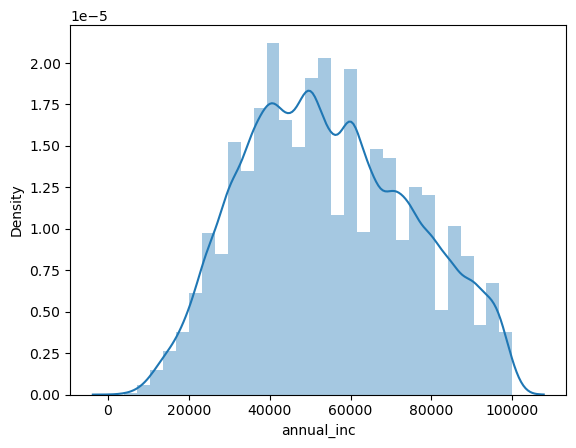

In [75]:


sns.distplot(new_loan_df[new_loan_df['annual_inc'] < 100000]['annual_inc'], bins=30)
plt.show()

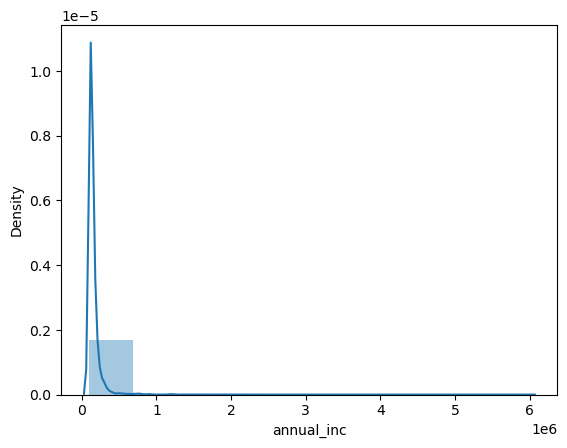

In [76]:
sns.distplot(new_loan_df[new_loan_df['annual_inc'] > 100000]['annual_inc'], bins=10)
plt.show()

##### Annual Income mostly lied in the range of 40-75k

In [78]:
def univariate_num_analysis(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))  
    sns.histplot(df[col_name], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution Plot of {col_name}')
    sns.boxplot(x=df[col_name], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col_name}')
    # sns.histplot(df[col_name], bins=20, kde=False, ax=axes[2])
    # axes[2].set_title(f'Histogram of {col_name}')
    plt.tight_layout()
    plt.show()

We are dividing the data colums to negative (w.r.t charge off), positive (w.r.t fully paid) and loan numerical params.
Let us analyze the graphs how they are distributed

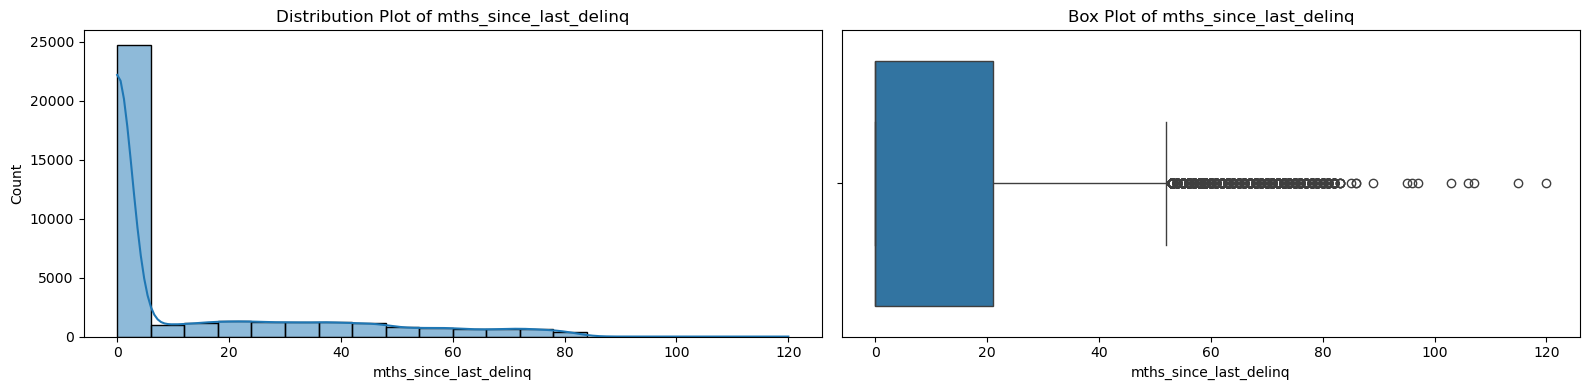

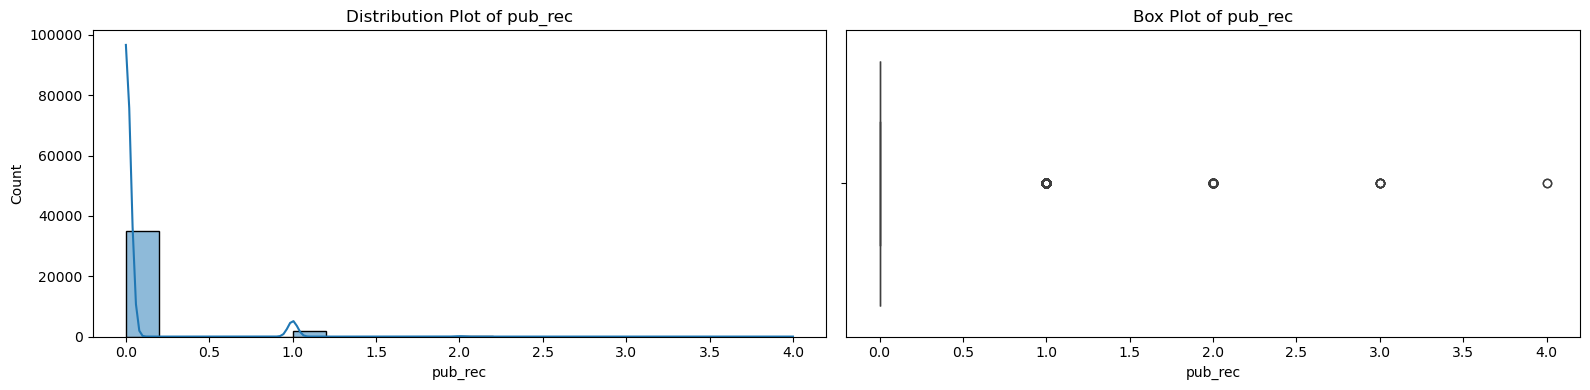

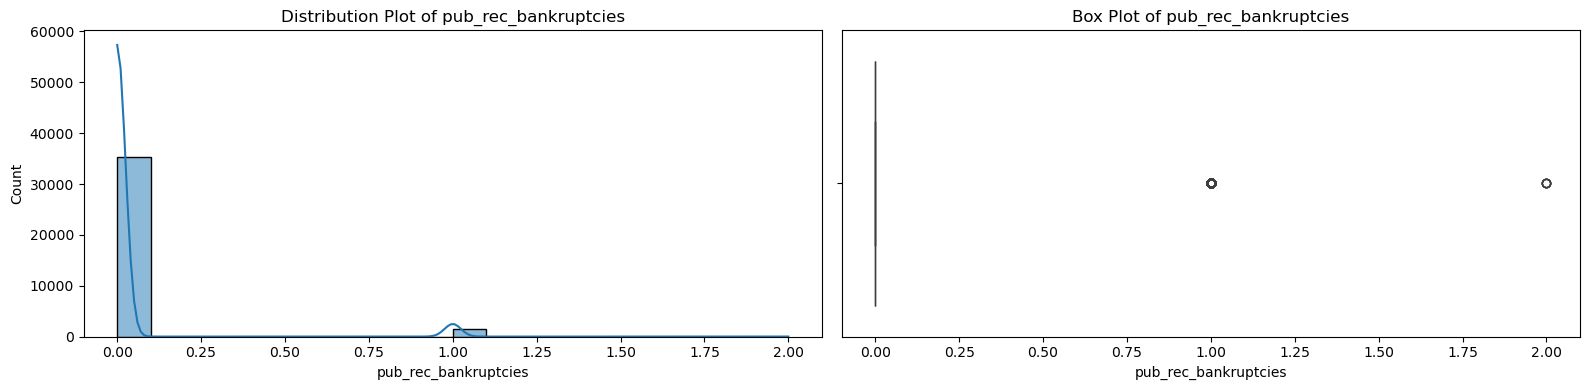

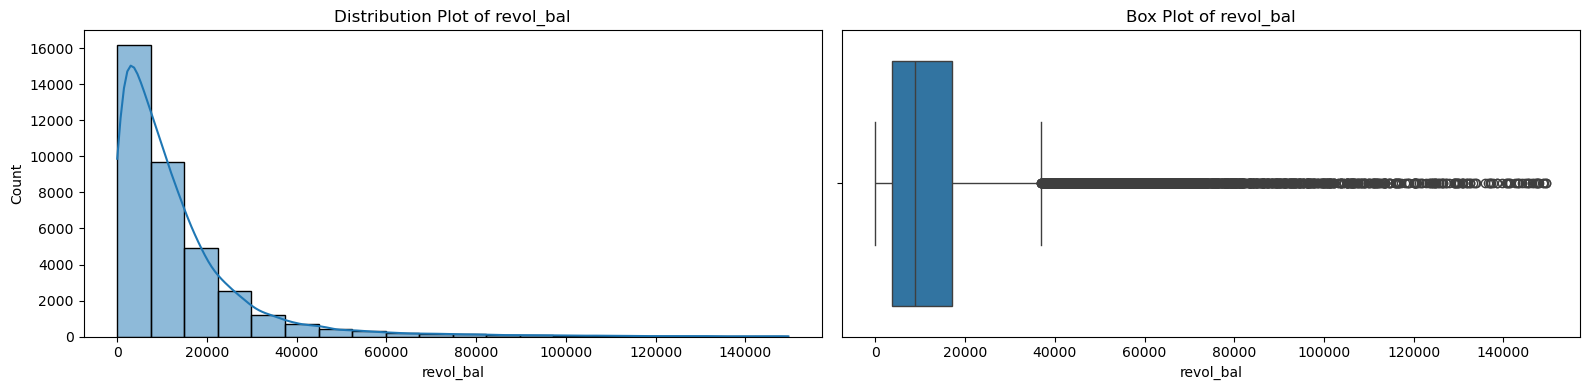

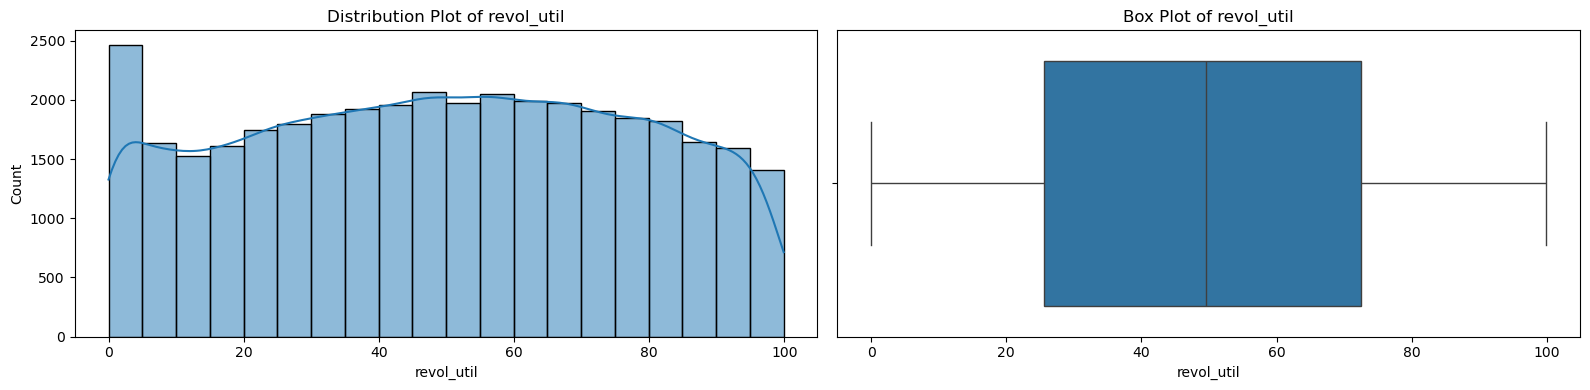

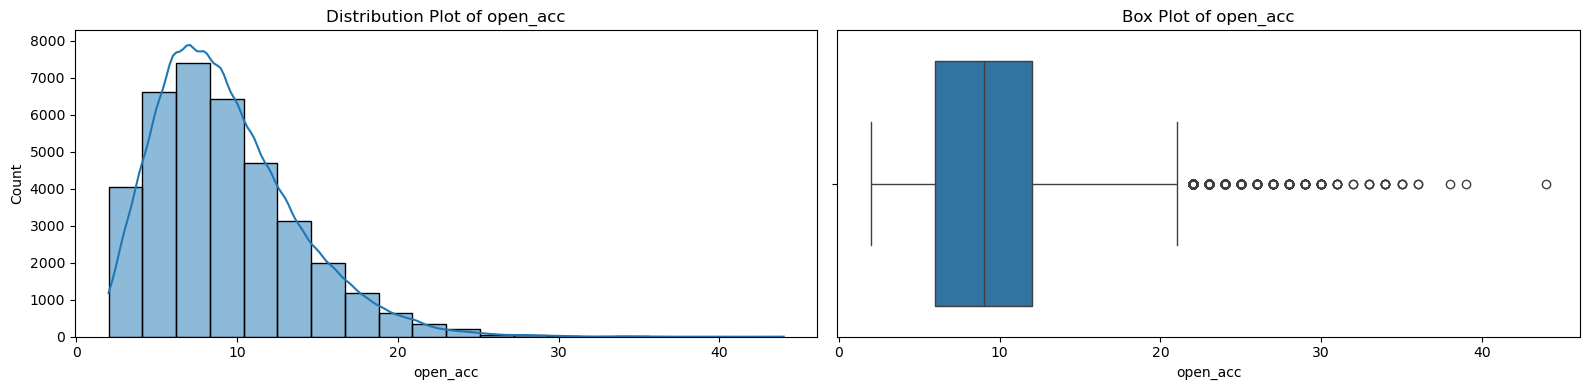

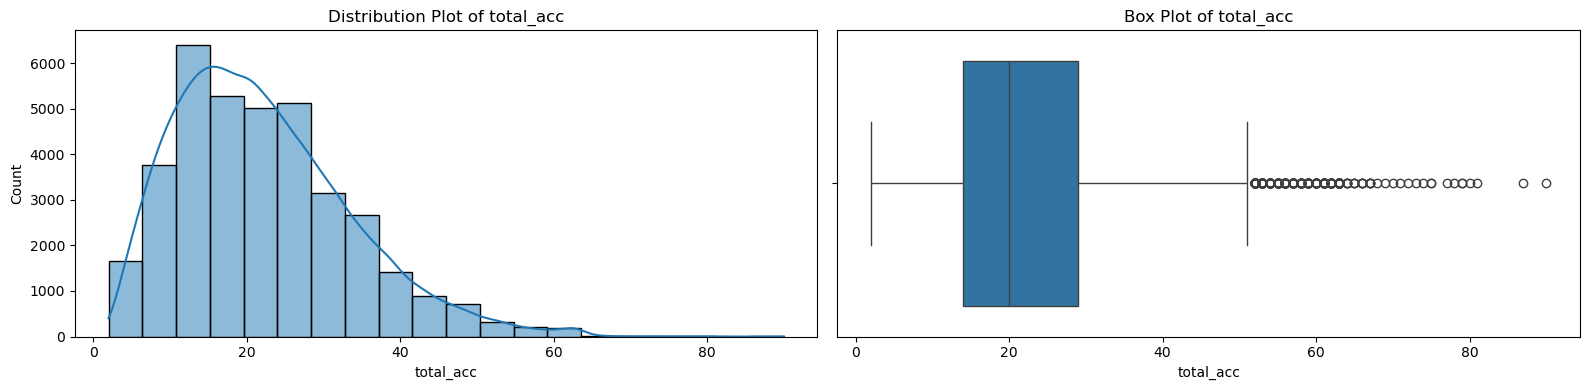

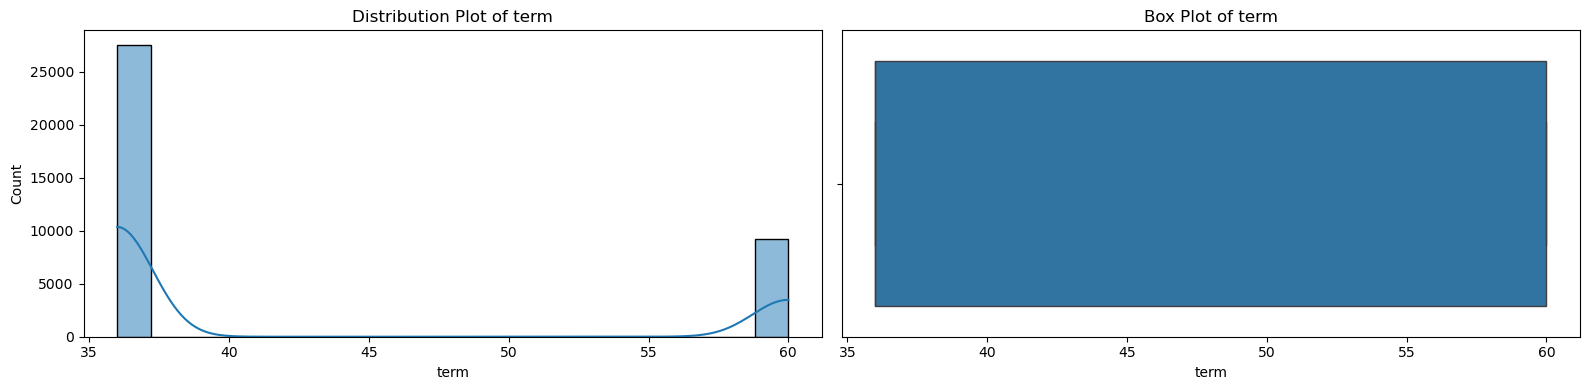

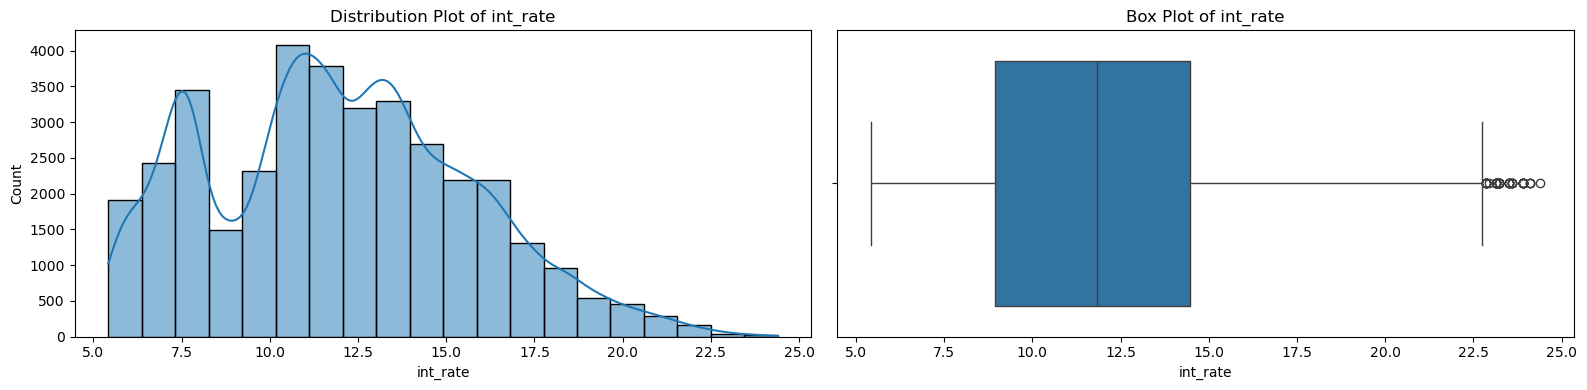

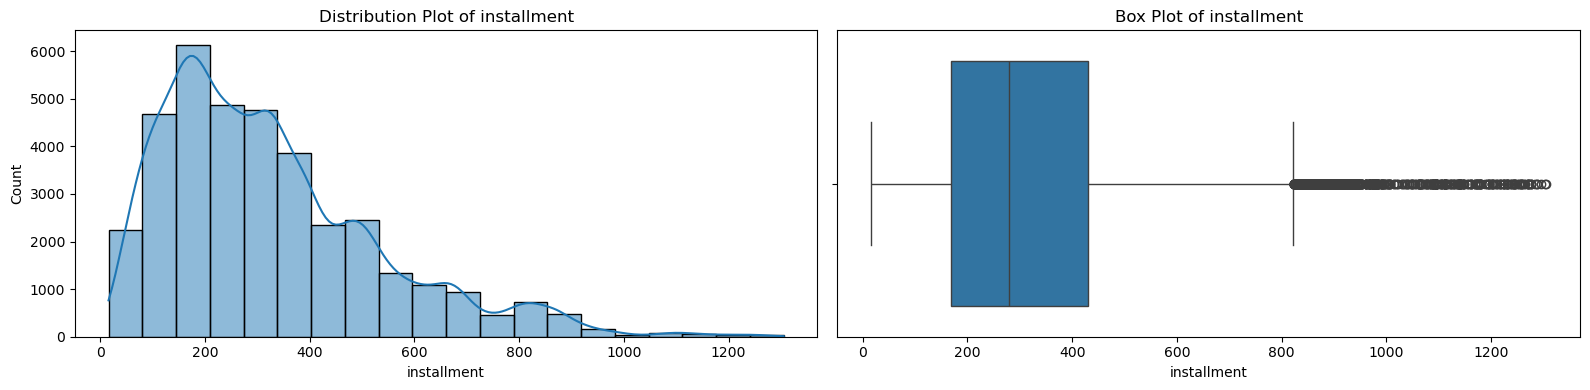

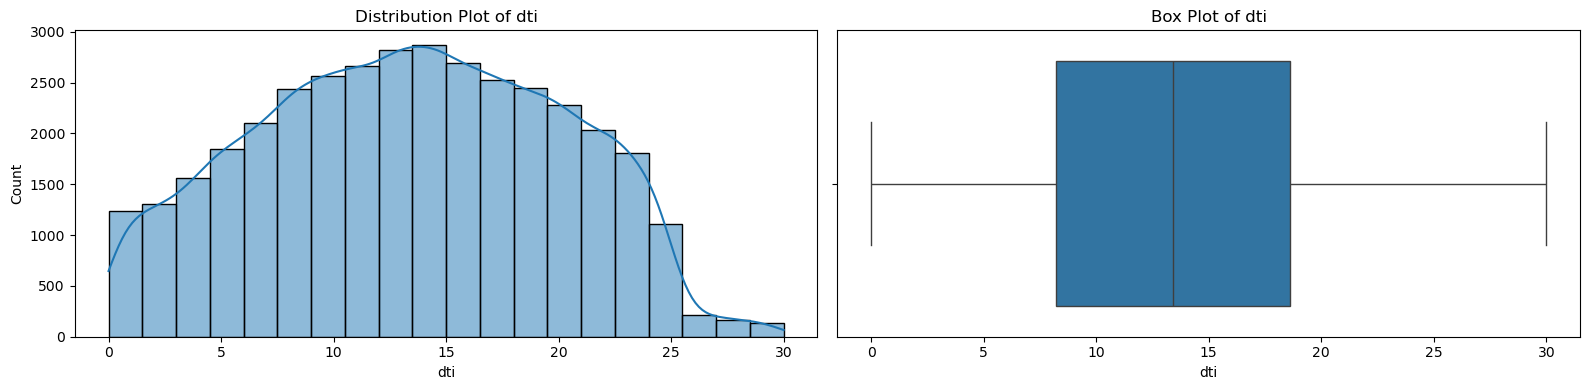

In [80]:
negative_confidence = ['mths_since_last_delinq','pub_rec','pub_rec_bankruptcies']
neutral_confidence = ['revol_bal', 'revol_util','open_acc','total_acc' ]
loan_numerical_params = [ 'term', 'int_rate', 'installment', 'dti']
for i in negative_confidence :
    univariate_num_analysis(loan_df, i)
for i in neutral_confidence :
    univariate_num_analysis(loan_df, i)
for i in loan_numerical_params :
    univariate_num_analysis(loan_df, i)

##### Interest Rate : Most of the interest rate is in the range 5% to 16% and the max at 22%
##### DTI : Most of the DTI ranges from 0 to 20 and ,max being at 30
##### Installment :  20 to 400 and maximum being at 700
##### Term : All the people stuck to either 36 or 60 months loan pay off term





### Univariate Analysis of Categorical Columns

In [83]:
categorical_columns

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'issue_d_year',
 'issue_d_month']

In [84]:
def univariate_cat_analysis(df,col):
    col_counts = df[col].value_counts().reset_index()
    col_counts.columns = [col, 'count']
    sns.barplot(x = col, y='count', data= col_counts)
    plt.xticks(rotation=90,fontsize = 8)
    plt.show()

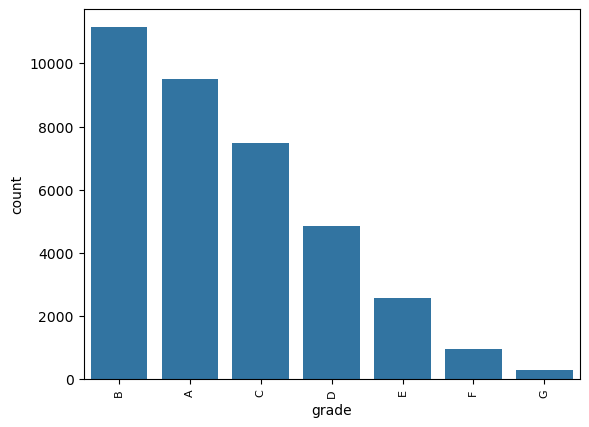

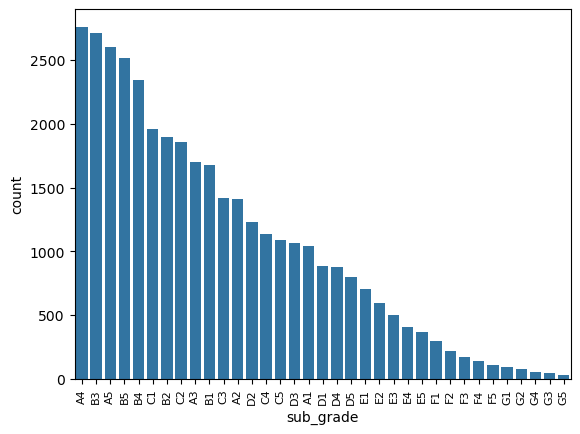

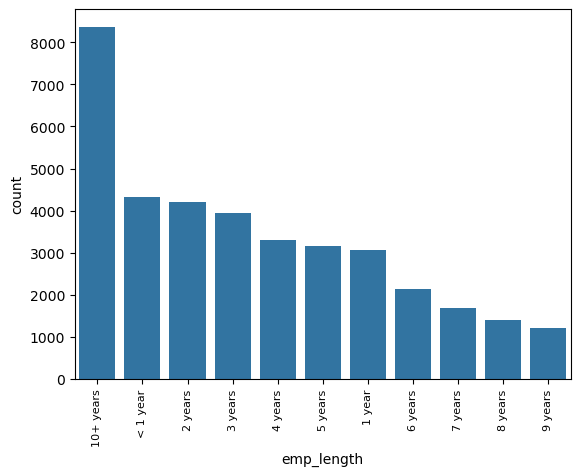

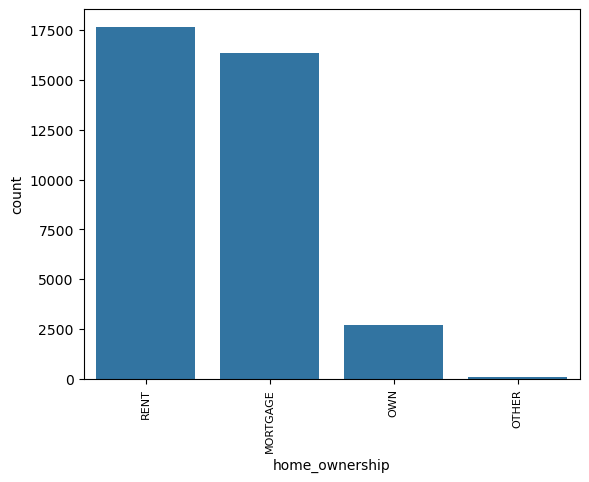

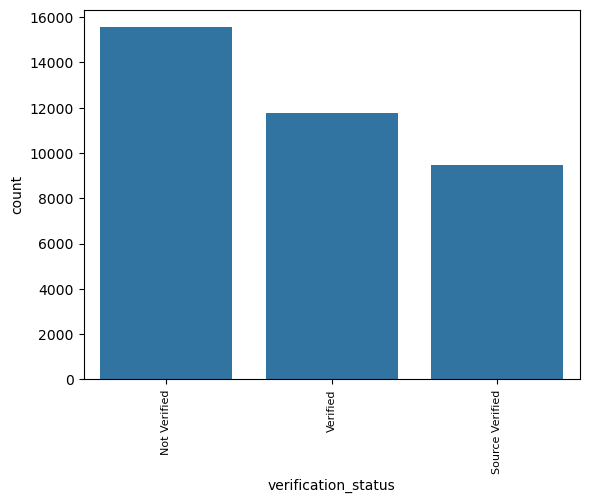

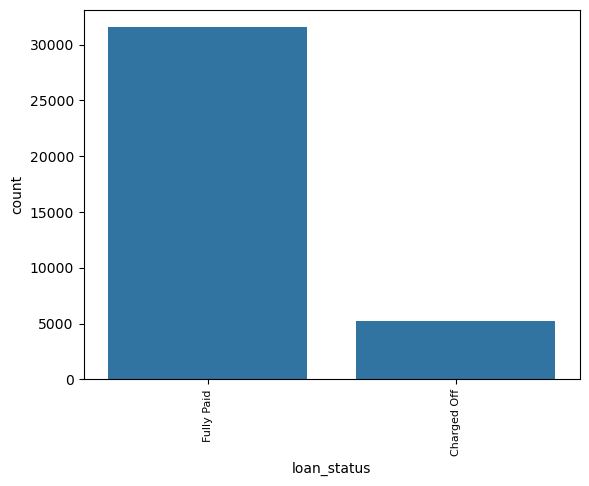

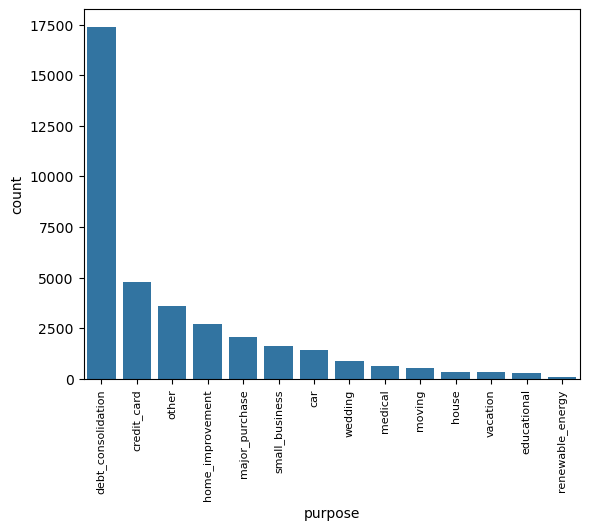

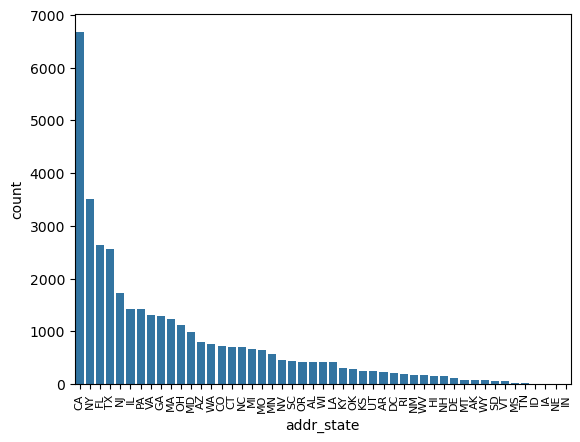

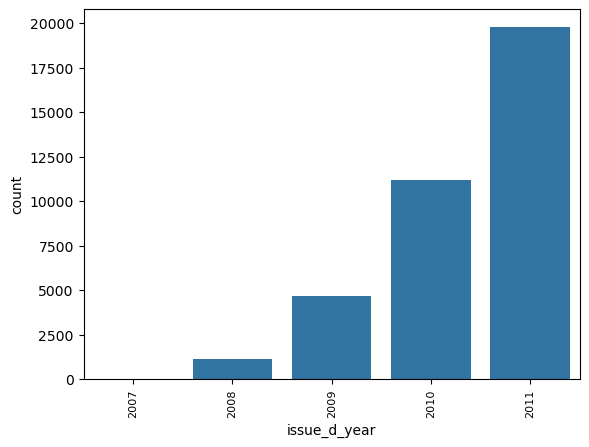

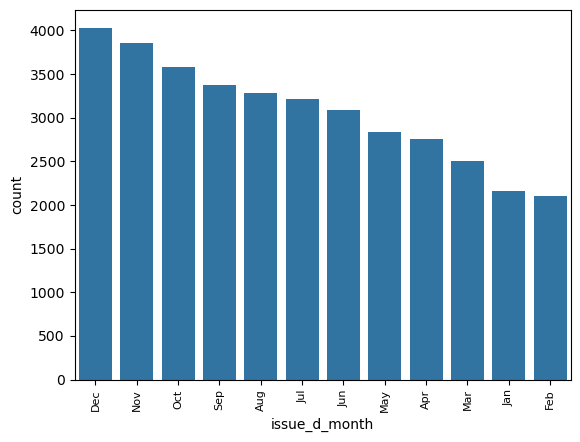

In [85]:
for col in categorical_columns:
    univariate_cat_analysis(loan_df,col)

##### Grade: Majority of the people belong to Grade B
##### Sub_Grade: Majority of the people belomg to A4 sub grade followed by B3,A5,B5 and B4
##### Emp_Length: Most of the people have an experience of more than 10 years followed by less than 1 year and 2 years of experience
##### Home_ownership : Majority of the people live in a rented house
##### Verification_Status : Most of the people are not verified by LC
##### Loan_Status : Majority of the folks fully paid off the loan
##### Purpose : Most of them applies loan for Debt Consolidation
##### Addr_State : Most of the people belong to California followed by NewYork
##### issue_d_year : Loan was funded for majority of the people in the year 2011 followed by 2010
##### issue_d_month : Loan was funded for majority of the people in the month December followed by November

### Bivariate Analysis of Numerical Columns

In [88]:
def box_plot(df, col1_name, col2_name, target, height) :
    fig, axes = plt.subplots(1, 2, figsize=(16, height))  
    sns.boxplot(data=df, x = df[target], y = col1_name, ax = axes[0])
    axes[0].set_title(f'Box Plot of {col1_name} vs {target}')
    sns.boxplot(data=df, x = df[target], y = col2_name, ax = axes[1])
    axes[1].set_title(f'Box Plot of {col2_name} vs {target}')
    plt.tight_layout()
    plt.show()


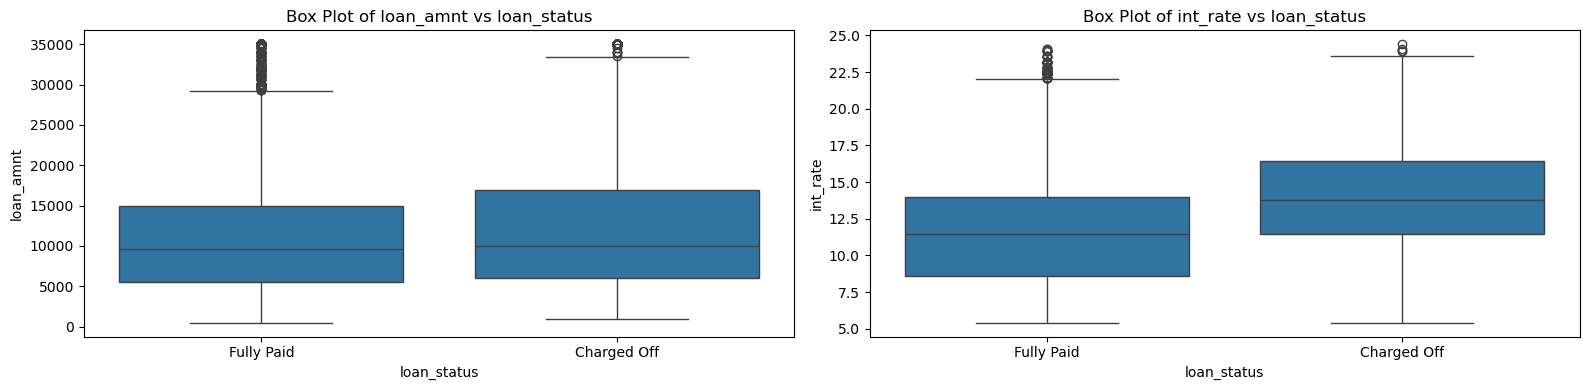

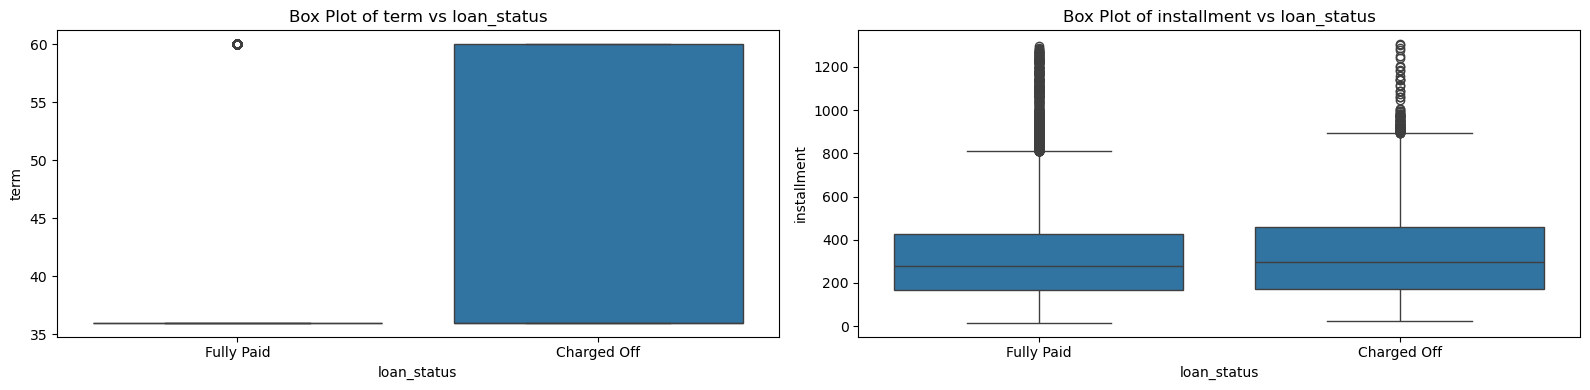

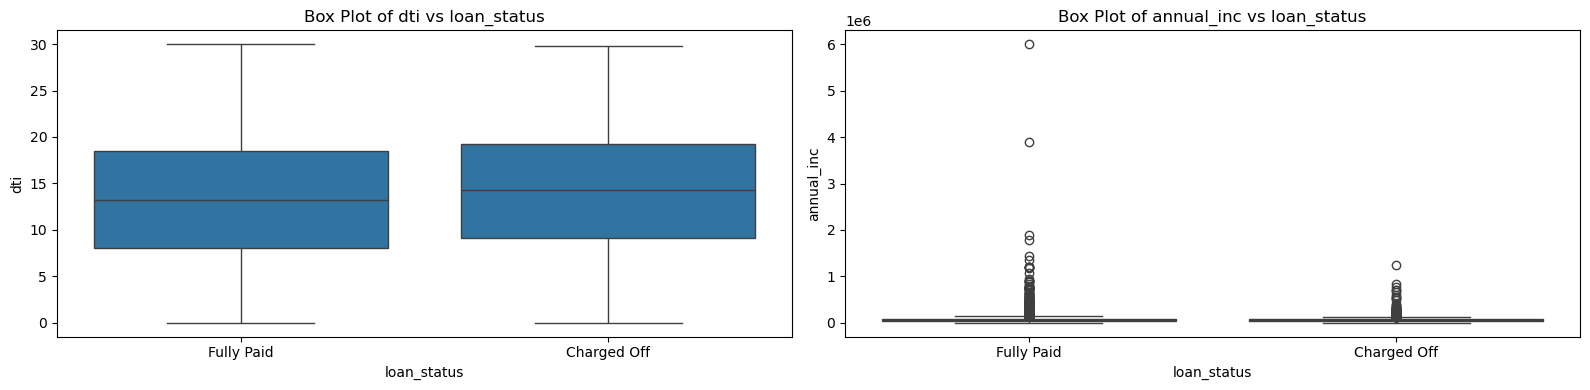

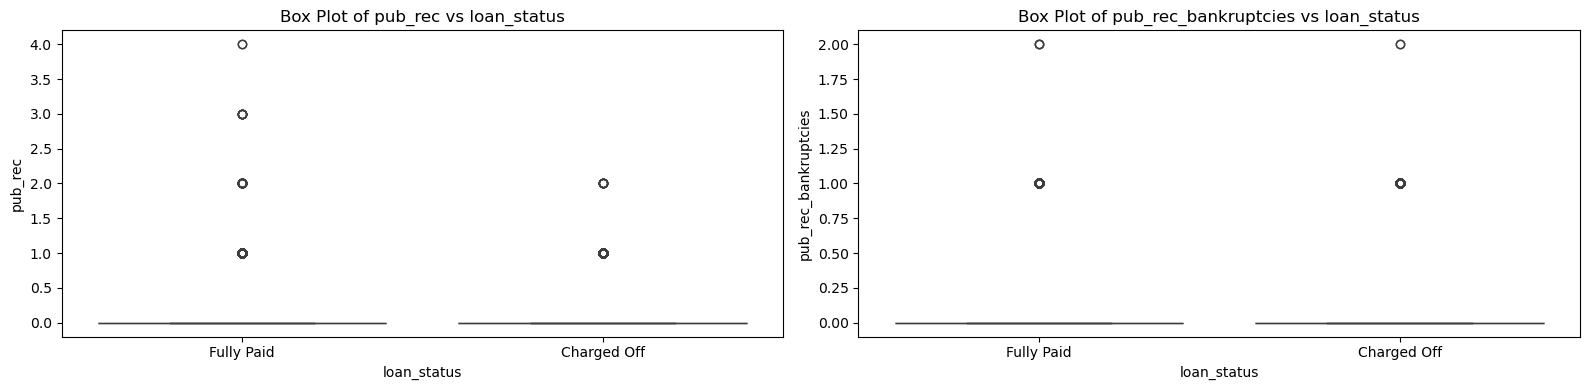

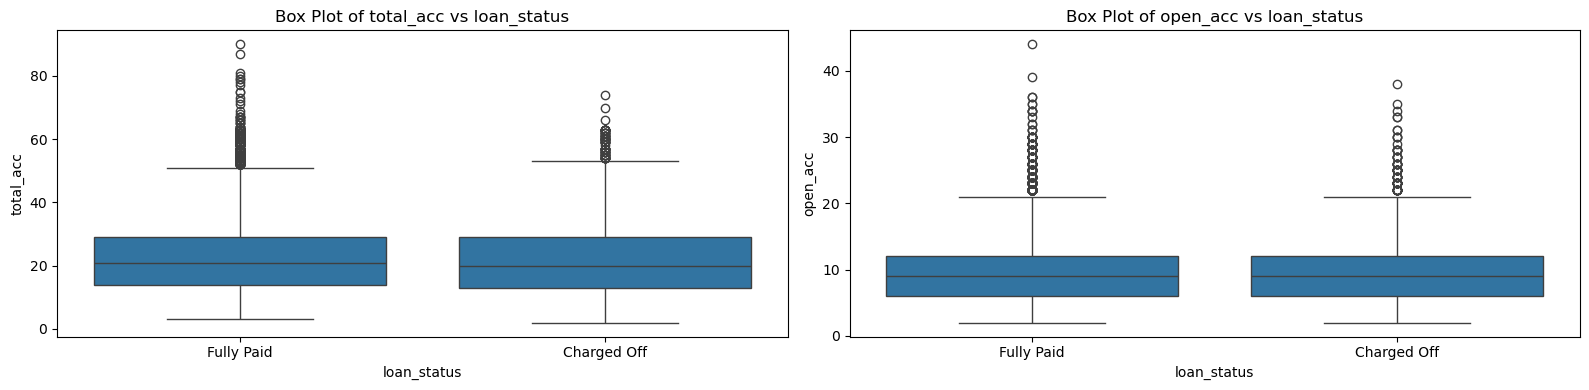

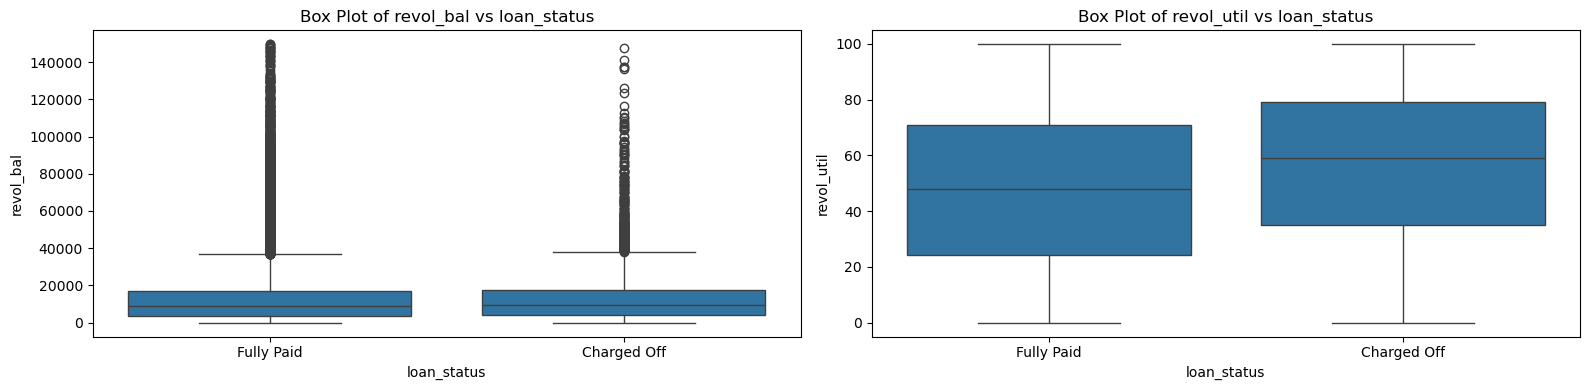

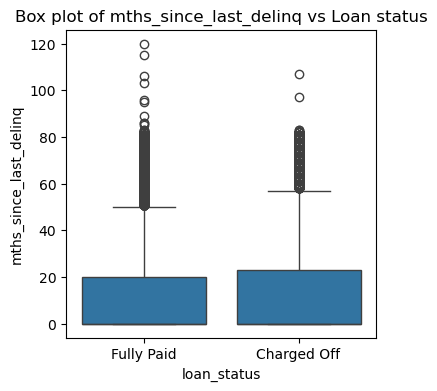

In [89]:
# Numerical vs Loan status
numerical_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 
                     'mths_since_last_delinq', 'open_acc','pub_rec', 'revol_bal', 'revol_util',
                      'total_acc', 'pub_rec_bankruptcies']

box_plot(new_loan_df,'loan_amnt', 'int_rate', 'loan_status', 4)
box_plot(new_loan_df,'term', 'installment', 'loan_status', 4)
box_plot(new_loan_df,'dti', 'annual_inc', 'loan_status', 4)
box_plot(new_loan_df,'pub_rec', 'pub_rec_bankruptcies', 'loan_status', 4)
box_plot(new_loan_df,'total_acc', 'open_acc', 'loan_status', 4)
box_plot(new_loan_df,'revol_bal', 'revol_util', 'loan_status', 4)
fig, axes = plt.subplots(1, 1, figsize=(4,4))  
sns.boxplot(data = new_loan_df, x = new_loan_df['loan_status'], y = 'mths_since_last_delinq')
axes.set_title('Box plot of mths_since_last_delinq vs Loan status')
plt.show()



BI-VARIATE ANALYSIS
1. All variables are being compared with LOAN STATUS - whether able to Fully pay or Charge off
2. By observing the visualizations, we can see how each variable is affecting the LOAN STATUS

### Bivariate Analysis of Categorical variables

Analyzing categorical variables
Important parmaters - emp_length, grade/sub_grade, verification status, purpose

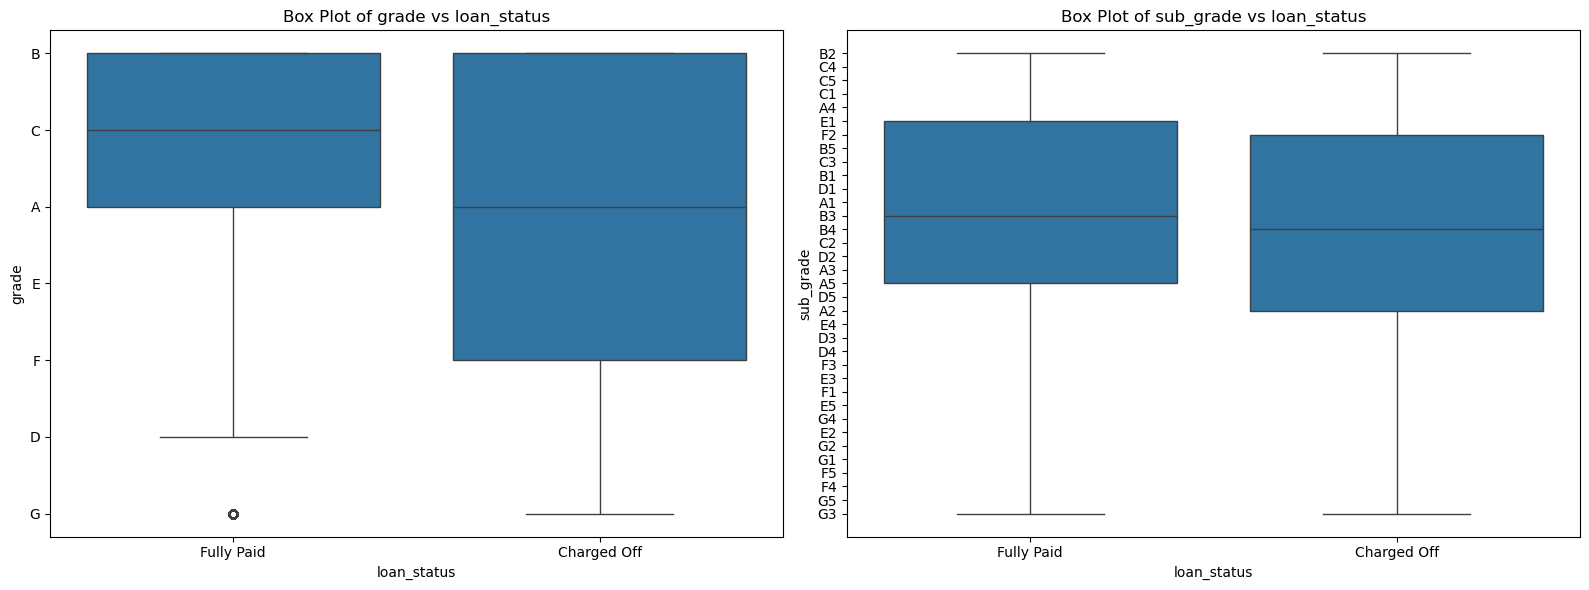

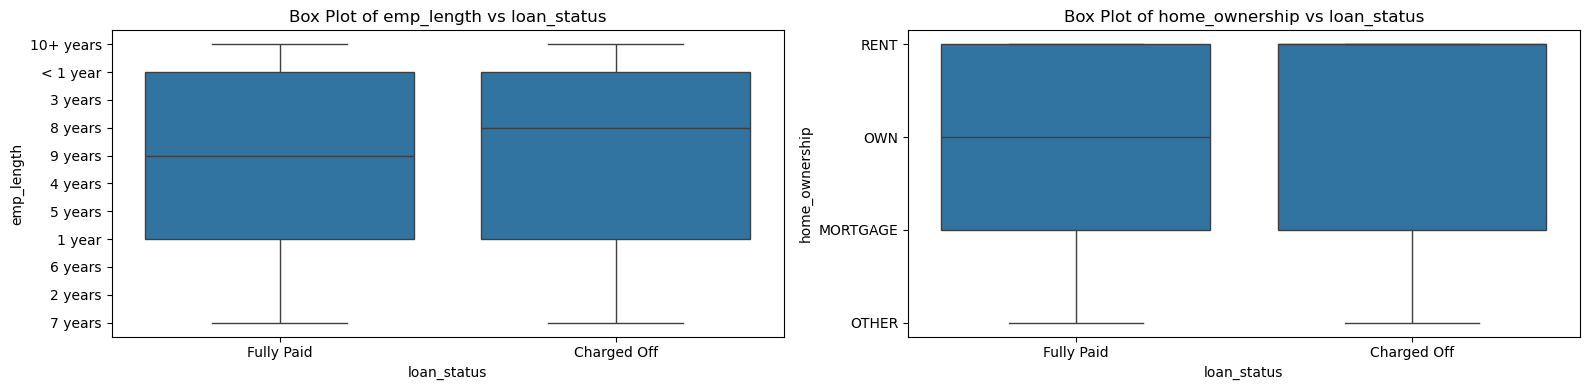

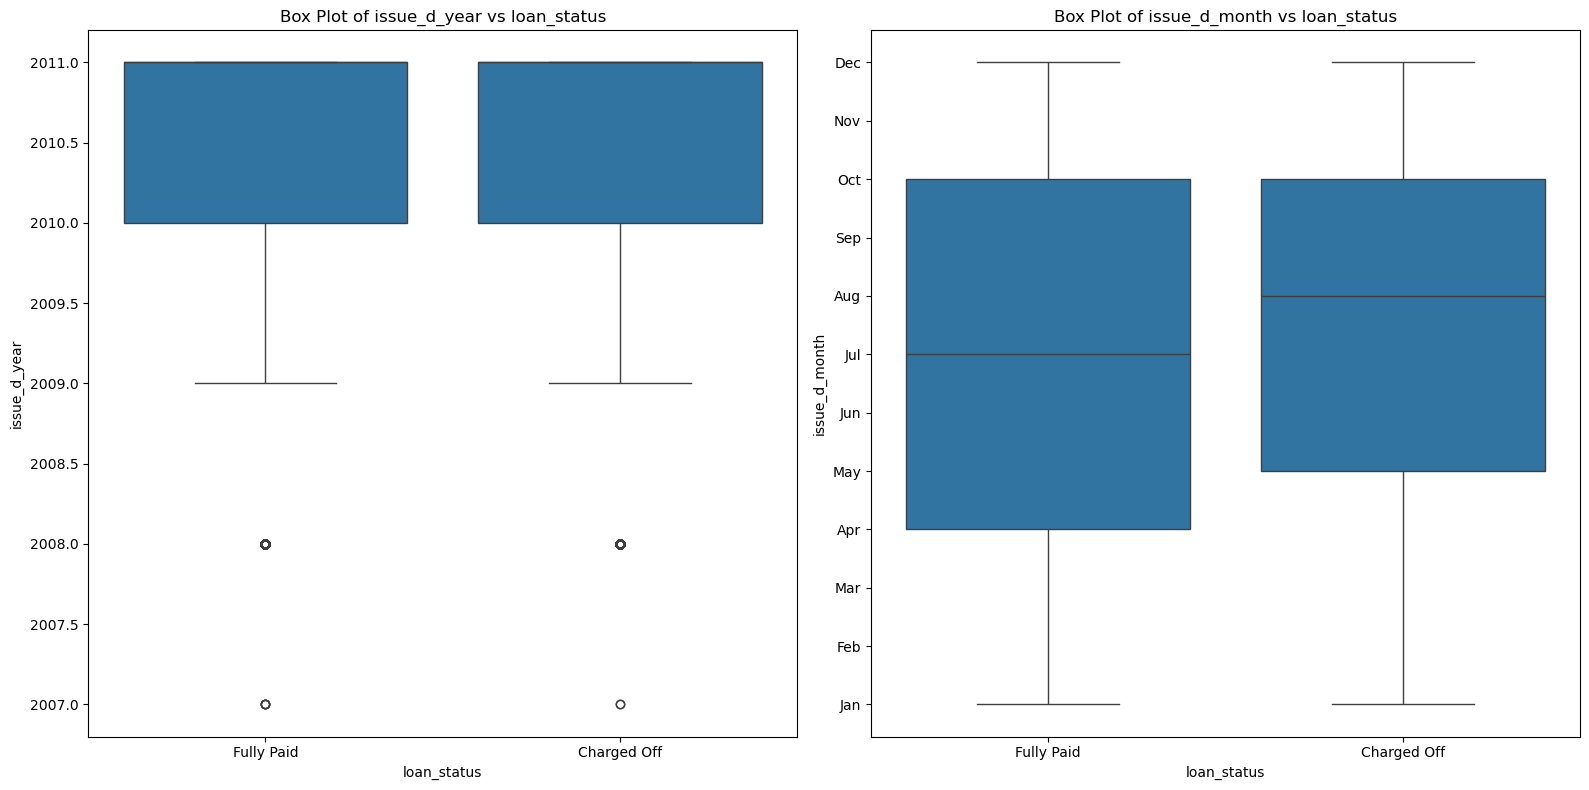

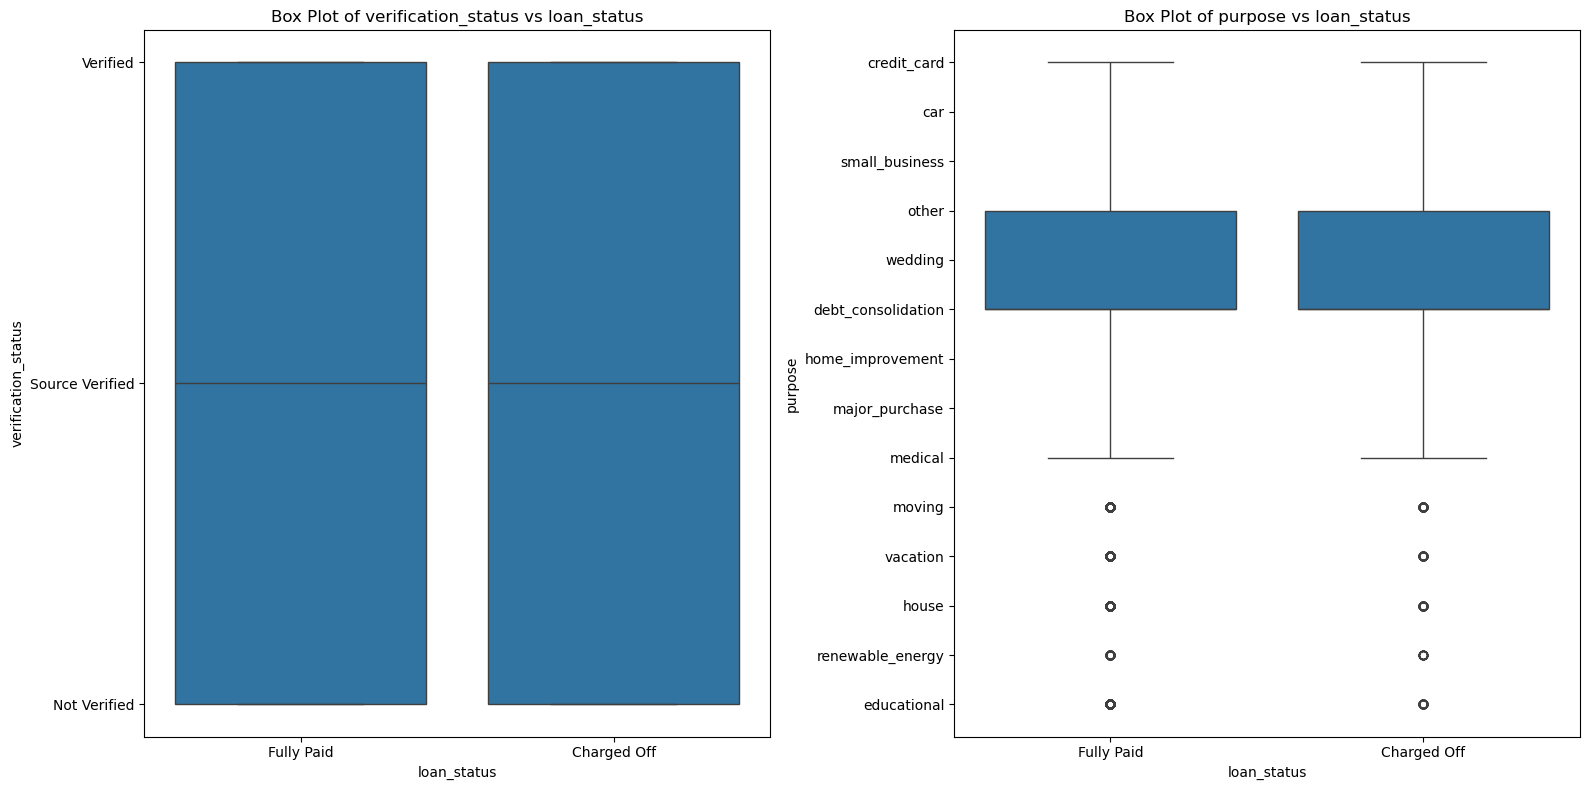

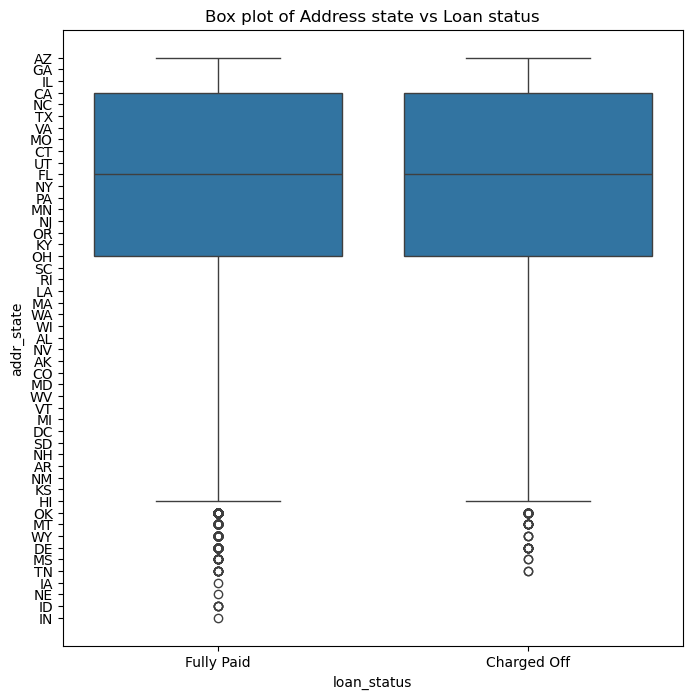

In [92]:
##Categorical variables vs Loan Status
categorical_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status',
                       'purpose', 'addr_state', 'issue_d_year', 'issue_d_month']


box_plot(new_loan_df,'grade', 'sub_grade', 'loan_status', 6)
box_plot(new_loan_df,'emp_length', 'home_ownership', 'loan_status', 4)
box_plot(new_loan_df,'issue_d_year', 'issue_d_month', 'loan_status', 8)
box_plot(new_loan_df,'verification_status', 'purpose', 'loan_status', 8)
fig, axes = plt.subplots(1, 1, figsize=(8,8))  
sns.boxplot(data = new_loan_df, x = new_loan_df['loan_status'], y = 'addr_state')
axes.set_title('Box plot of Address state vs Loan status')
plt.show()



In [93]:
def bivariate_analysis(df,xcol):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.barplot(data=df, x = df[xcol], y = df["Charged Off Ratio"], ax = axes[0])
    axes[0].set_title(f'Bar Plot of {xcol} vs "Charged Off Ratio" ')
    sns.barplot(data=df, x = df[xcol], y =  df['Fully Paid Ratio'], ax = axes[1])
    axes[1].set_title(f'Bar Plot of {xcol} vs "Fully Paid Ratio" ')
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 90)
    plt.show()

Proportions are very useful in determining the weight of column compared to target variable (loan_status)

In [95]:
def proportion_df(col,df):
    grouped = df.groupby([col, 'loan_status'])
    counted = grouped.loan_status.count()
    unstacked = counted.unstack()
    compare_df = unstacked.reset_index()
    compare_df['Total'] = compare_df['Charged Off'] + compare_df['Fully Paid']
    compare_df['Fully Paid Ratio'] = compare_df['Fully Paid'] / compare_df['Total']
    compare_df['Charged Off Ratio'] = compare_df['Charged Off'] / compare_df['Total']
    return compare_df
    

In [96]:
purpose_vs_loan = proportion_df('purpose',loan_df)

In [97]:
purpose_vs_loan

loan_status,purpose,Charged Off,Fully Paid,Total,Fully Paid Ratio,Charged Off Ratio
0,car,151,1278,1429,0.894332,0.105668
1,credit_card,501,4298,4799,0.895603,0.104397
2,debt_consolidation,2623,14750,17373,0.849019,0.150981
3,educational,49,247,296,0.834459,0.165541
4,home_improvement,319,2415,2734,0.883321,0.116679
5,house,58,291,349,0.833811,0.166189
6,major_purchase,206,1849,2055,0.899757,0.100243
7,medical,99,546,645,0.846512,0.153488
8,moving,81,460,541,0.850277,0.149723
9,other,578,3017,3595,0.839221,0.160779


In [98]:
categorical_columns_bivariate = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
                       'purpose', 'addr_state', 'issue_d_year', 'issue_d_month']

loan_status grade  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0               A          552        8966   9518          0.942005   
1               B         1326        9823  11149          0.881066   
2               C         1251        6223   7474          0.832620   
3               D         1049        3803   4852          0.783800   
4               E          686        1888   2574          0.733489   
5               F          304         635    939          0.676251   
6               G           98         196    294          0.666667   

loan_status  Charged Off Ratio  
0                     0.057995  
1                     0.118934  
2                     0.167380  
3                     0.216200  
4                     0.266511  
5                     0.323749  
6                     0.333333  


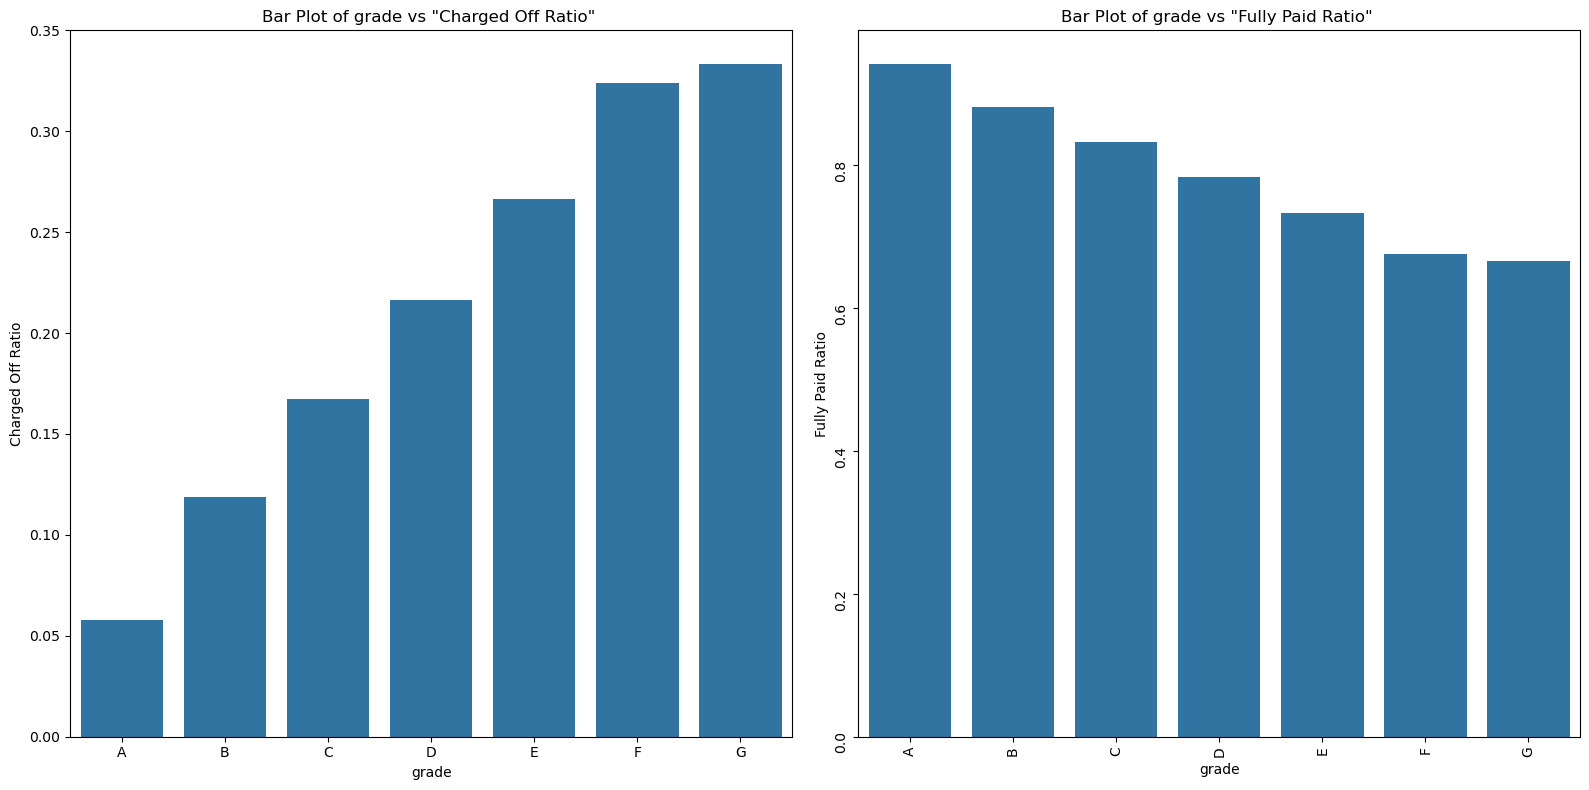

loan_status sub_grade  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0                  A1           24        1017   1041          0.976945   
1                  A2           67        1344   1411          0.952516   
2                  A3           87        1615   1702          0.948884   
3                  A4          167        2595   2762          0.939537   
4                  A5          207        2395   2602          0.920446   
5                  B1          149        1530   1679          0.911257   
6                  B2          203        1695   1898          0.893045   
7                  B3          323        2387   2710          0.880812   
8                  B4          312        2033   2345          0.866951   
9                  B5          339        2178   2517          0.865316   
10                 C1          309        1652   1961          0.842427   
11                 C2          299        1563   1862          0.839420   
12                 C3    

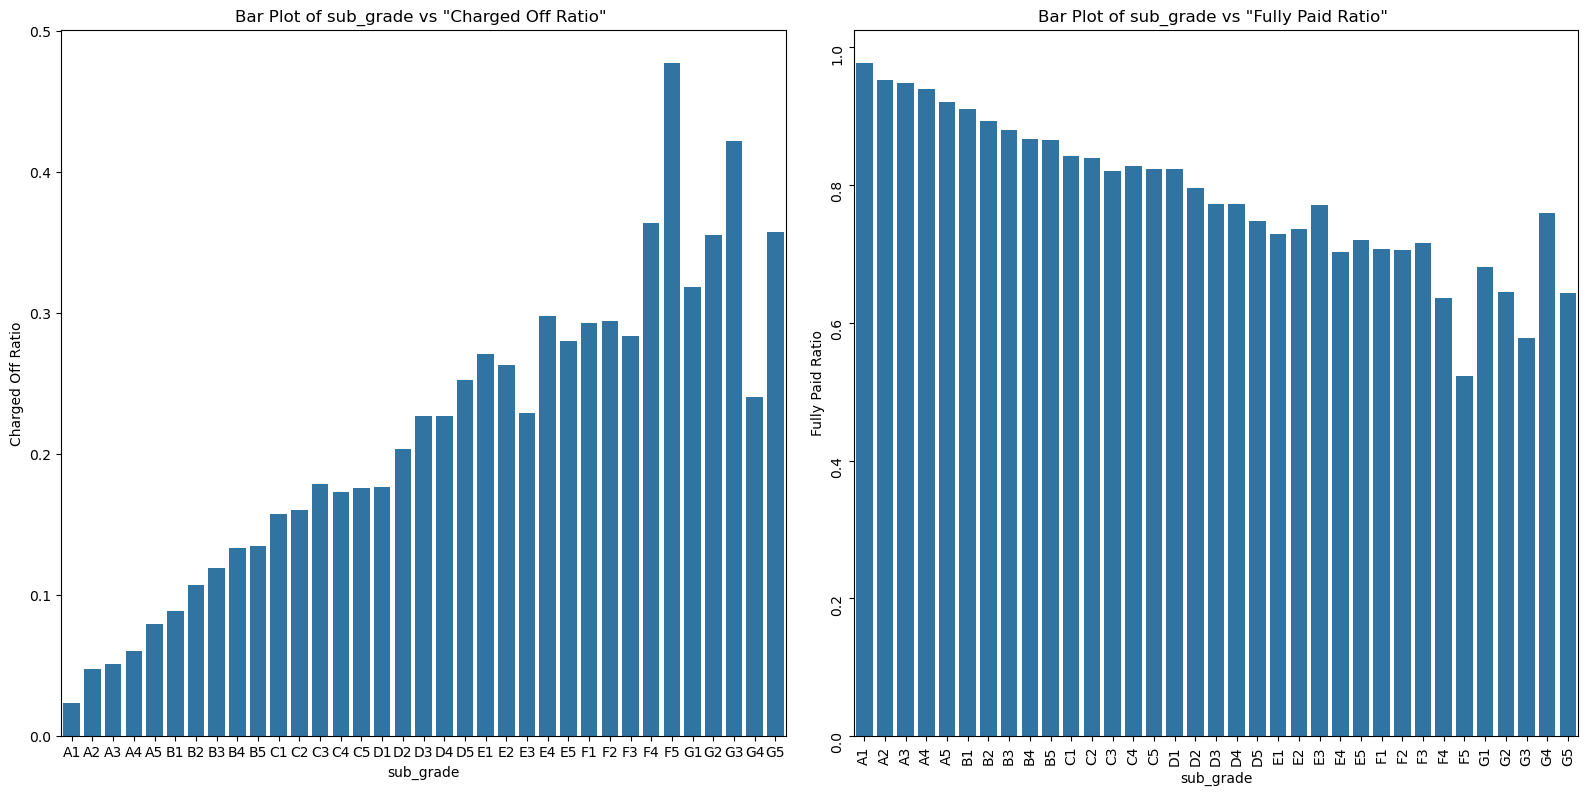

loan_status emp_length  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0               1 year          439        2632   3071          0.857050   
1            10+ years         1302        7066   8368          0.844407   
2              2 years          555        3647   4202          0.867920   
3              3 years          549        3398   3947          0.860907   
4              4 years          448        2842   3290          0.863830   
5              5 years          453        2704   3157          0.856509   
6              6 years          299        1834   2133          0.859822   
7              7 years          258        1428   1686          0.846975   
8              8 years          199        1209   1408          0.858665   
9              9 years          156        1053   1209          0.870968   
10            < 1 year          608        3721   4329          0.859552   

loan_status  Charged Off Ratio  
0                     0.142950  
1                    

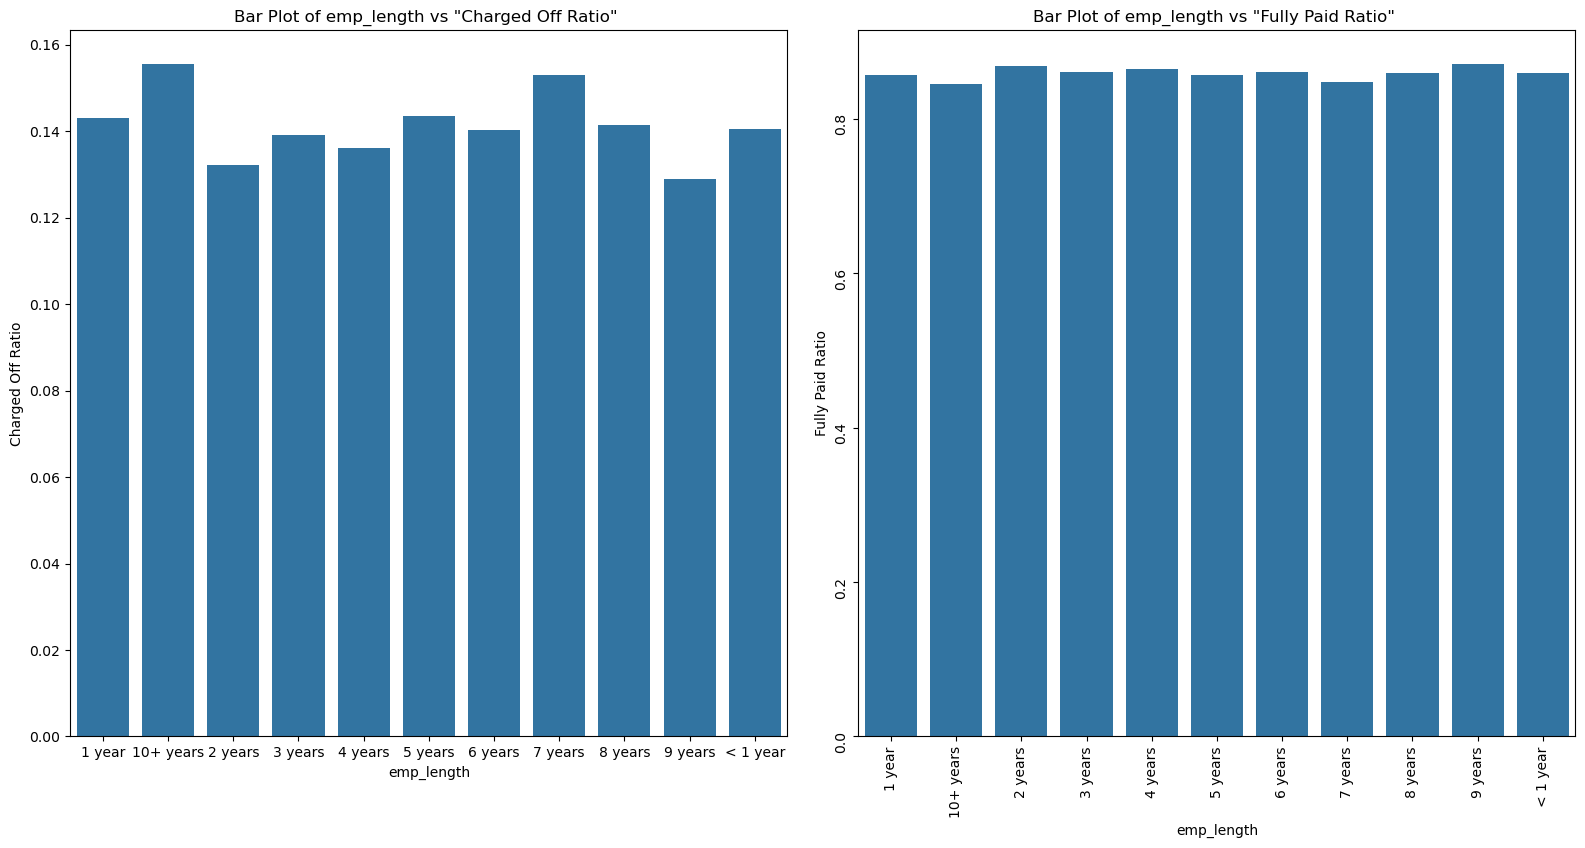

loan_status home_ownership  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0                 MORTGAGE         2196       14138  16334          0.865557   
1                    OTHER           18          78     96          0.812500   
2                      OWN          385        2318   2703          0.857566   
3                     RENT         2667       15000  17667          0.849041   

loan_status  Charged Off Ratio  
0                     0.134443  
1                     0.187500  
2                     0.142434  
3                     0.150959  


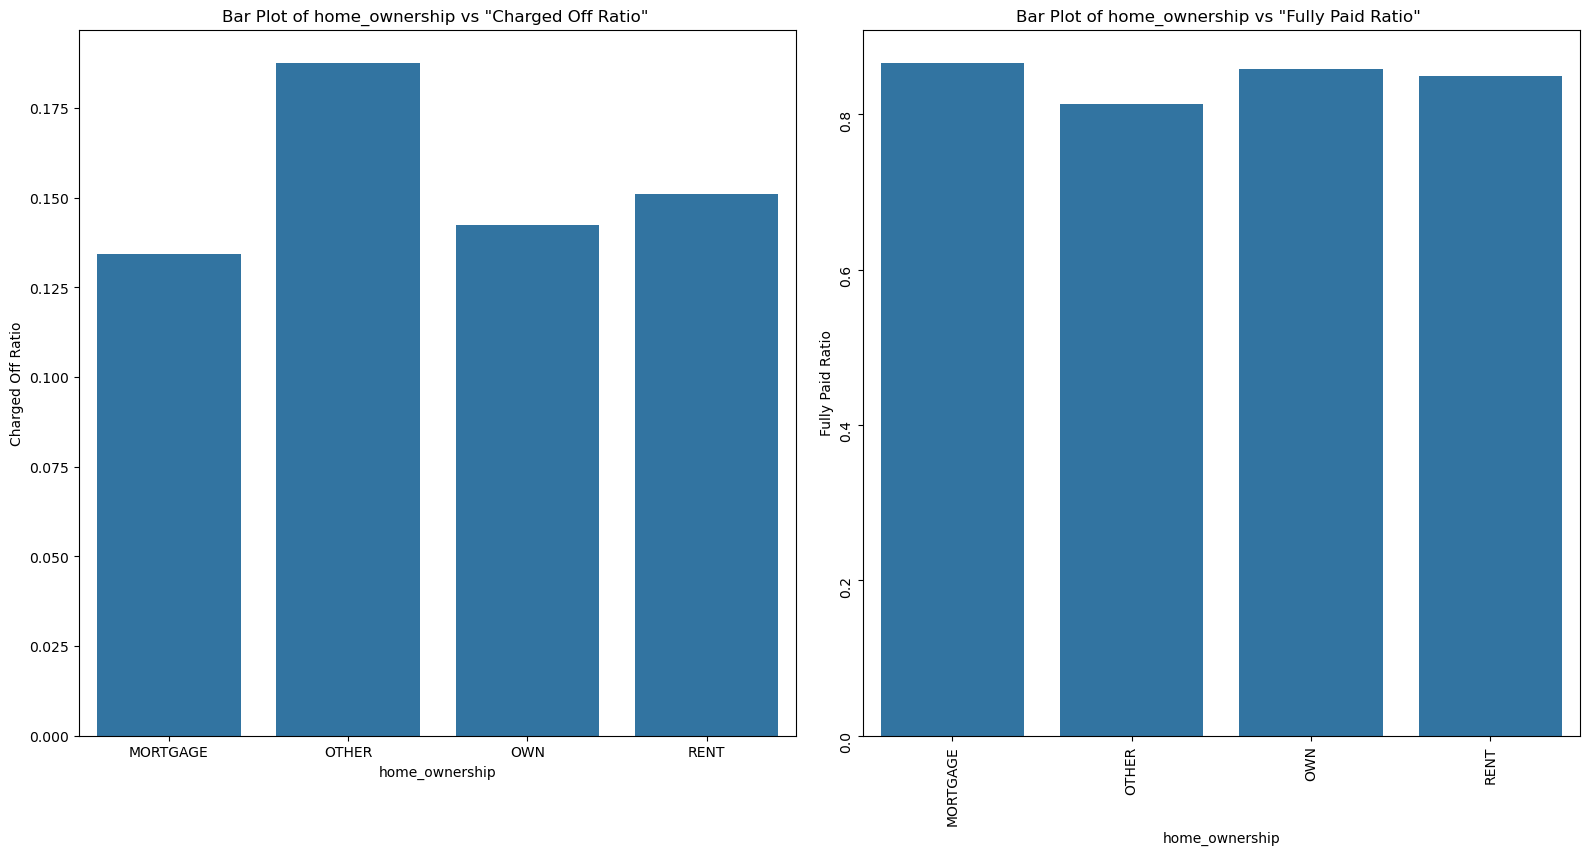

loan_status verification_status  Charged Off  Fully Paid  Total  \
0                  Not Verified         1924       13630  15554   
1               Source Verified         1393        8090   9483   
2                      Verified         1949        9814  11763   

loan_status  Fully Paid Ratio  Charged Off Ratio  
0                    0.876302           0.123698  
1                    0.853106           0.146894  
2                    0.834311           0.165689  


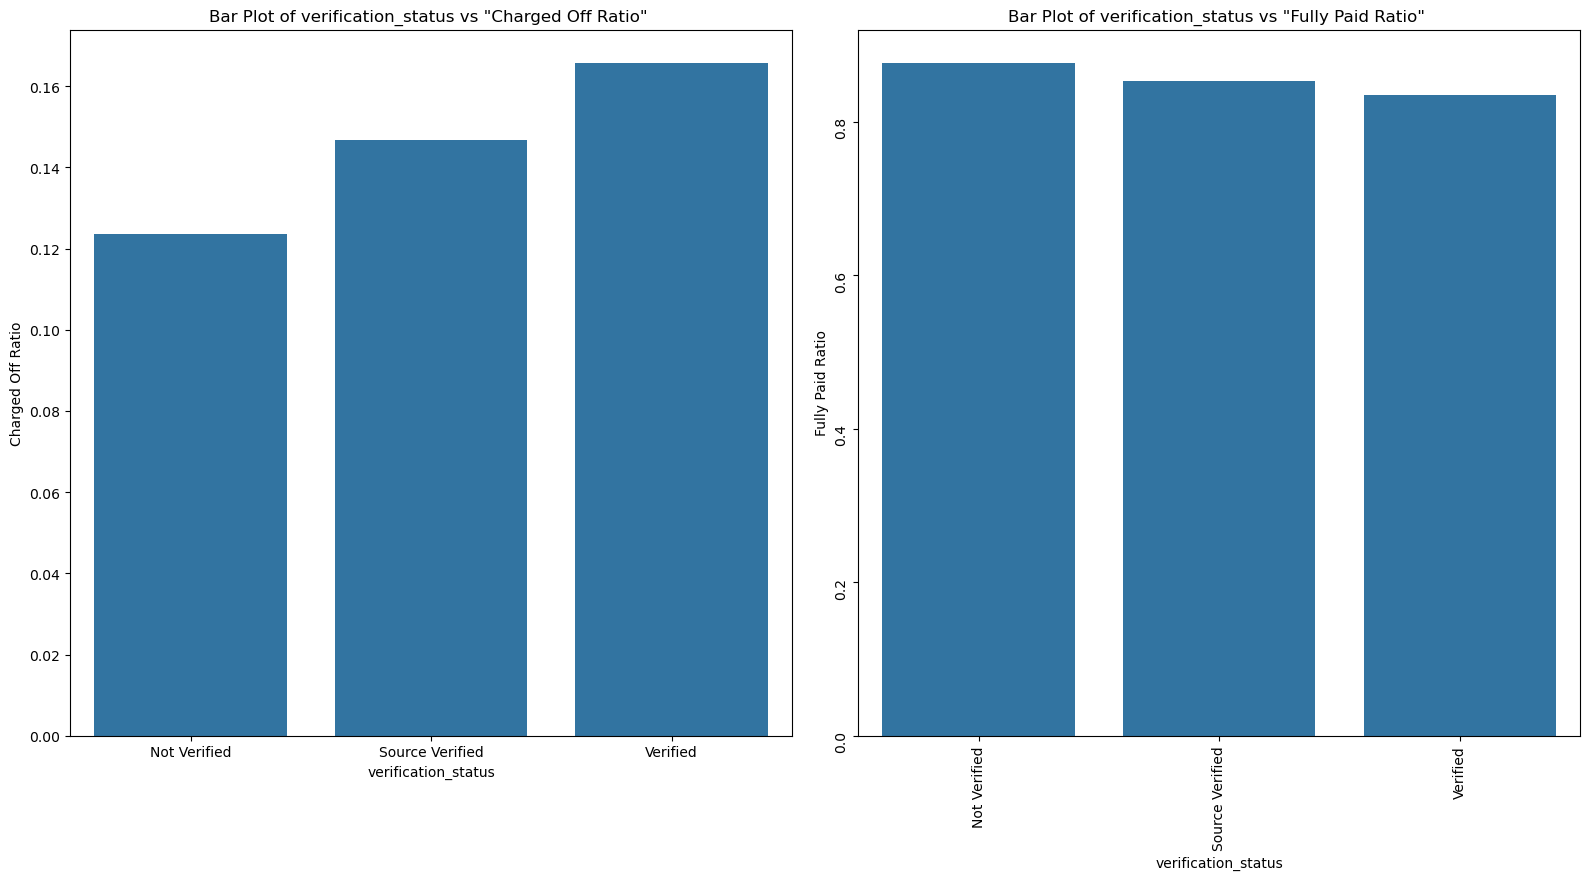

loan_status             purpose  Charged Off  Fully Paid  Total  \
0                           car          151        1278   1429   
1                   credit_card          501        4298   4799   
2            debt_consolidation         2623       14750  17373   
3                   educational           49         247    296   
4              home_improvement          319        2415   2734   
5                         house           58         291    349   
6                major_purchase          206        1849   2055   
7                       medical           99         546    645   
8                        moving           81         460    541   
9                         other          578        3017   3595   
10             renewable_energy           18          76     94   
11               small_business          444        1212   1656   
12                     vacation           50         291    341   
13                      wedding           89         804    89

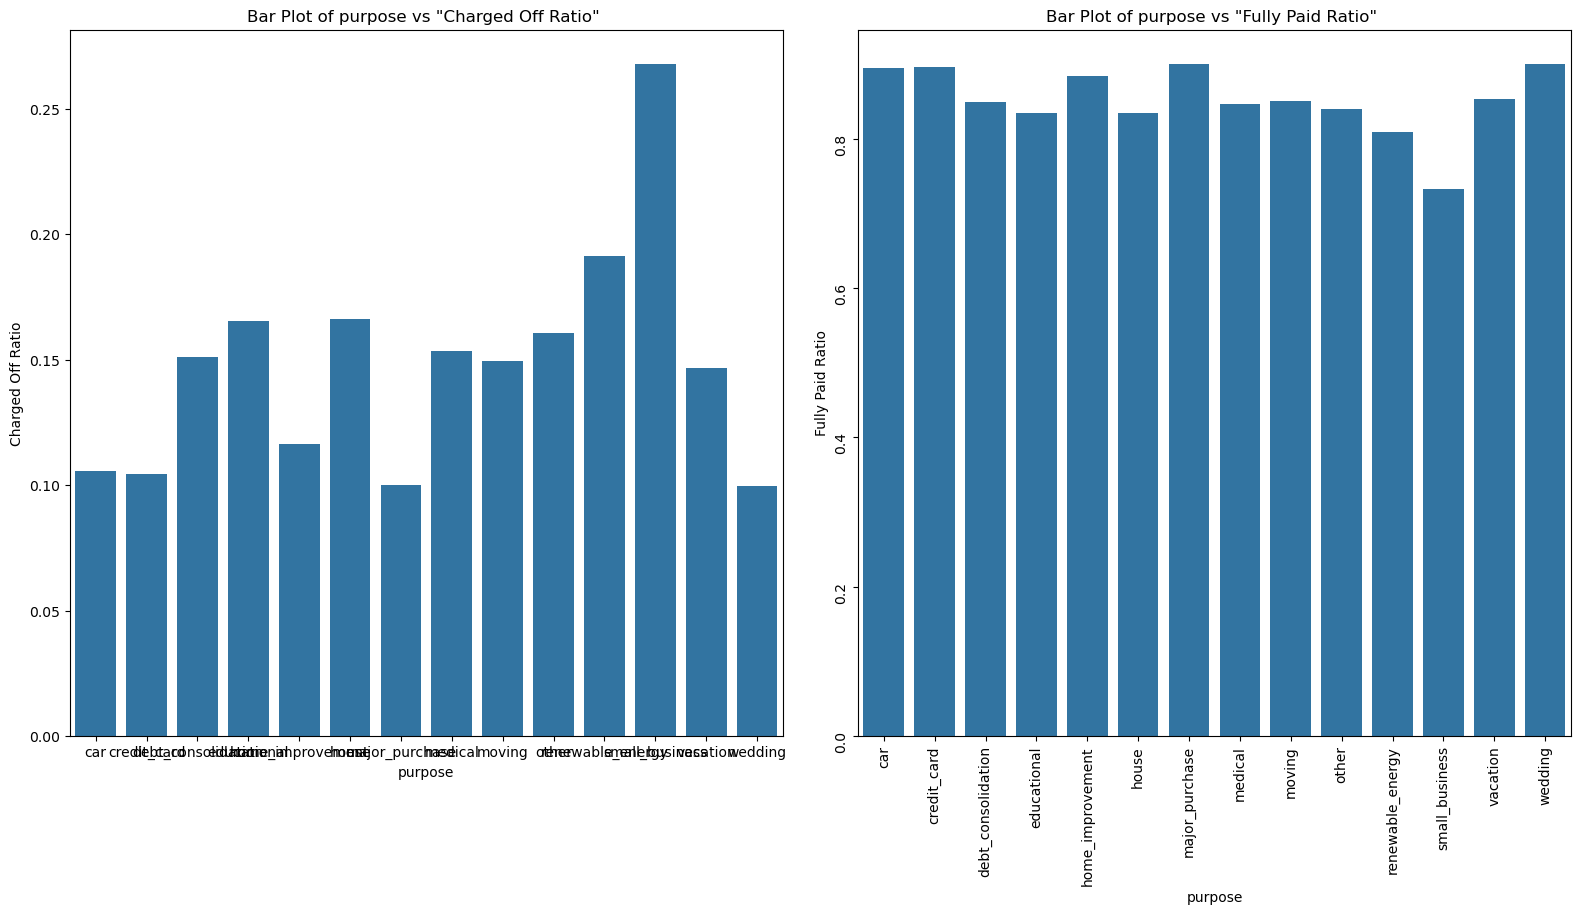

loan_status addr_state  Charged Off  Fully Paid   Total  Fully Paid Ratio  \
0                   AK         15.0        60.0    75.0          0.800000   
1                   AL         50.0       360.0   410.0          0.878049   
2                   AR         26.0       197.0   223.0          0.883408   
3                   AZ        113.0       678.0   791.0          0.857143   
4                   CA       1050.0      5628.0  6678.0          0.842767   
5                   CO         87.0       634.0   721.0          0.879334   
6                   CT         87.0       610.0   697.0          0.875179   
7                   DC         14.0       192.0   206.0          0.932039   
8                   DE         11.0        96.0   107.0          0.897196   
9                   FL        462.0      2179.0  2641.0          0.825066   
10                  GA        202.0      1092.0  1294.0          0.843895   
11                  HI         28.0       132.0   160.0          0.825000   

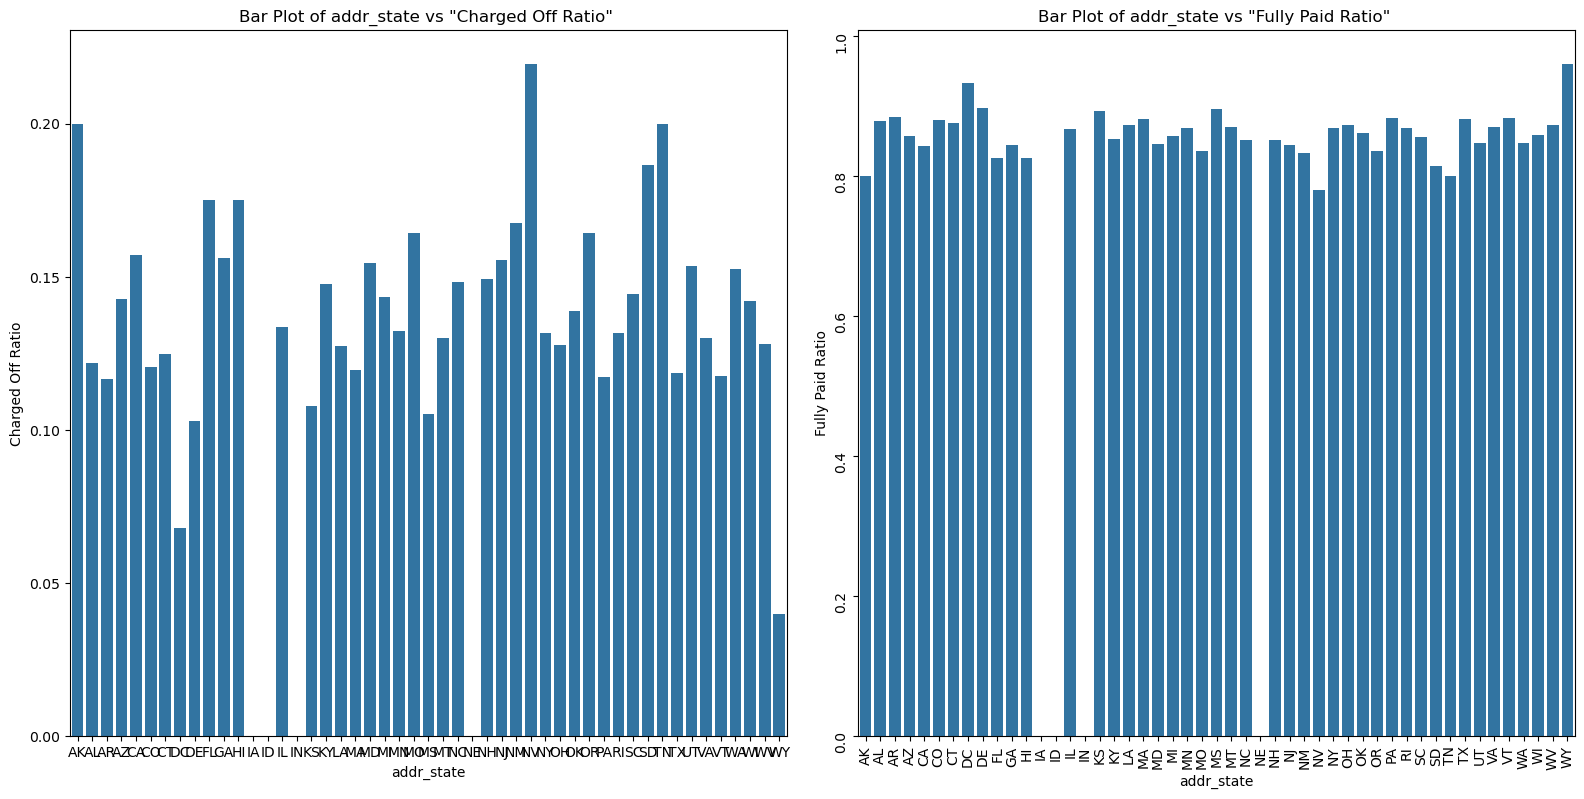

loan_status  issue_d_year  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0                    2007            2           5      7          0.714286   
1                    2008          169         935   1104          0.846920   
2                    2009          590        4109   4699          0.874441   
3                    2010         1406        9790  11196          0.874419   
4                    2011         3099       16695  19794          0.843437   

loan_status  Charged Off Ratio  
0                     0.285714  
1                     0.153080  
2                     0.125559  
3                     0.125581  
4                     0.156563  


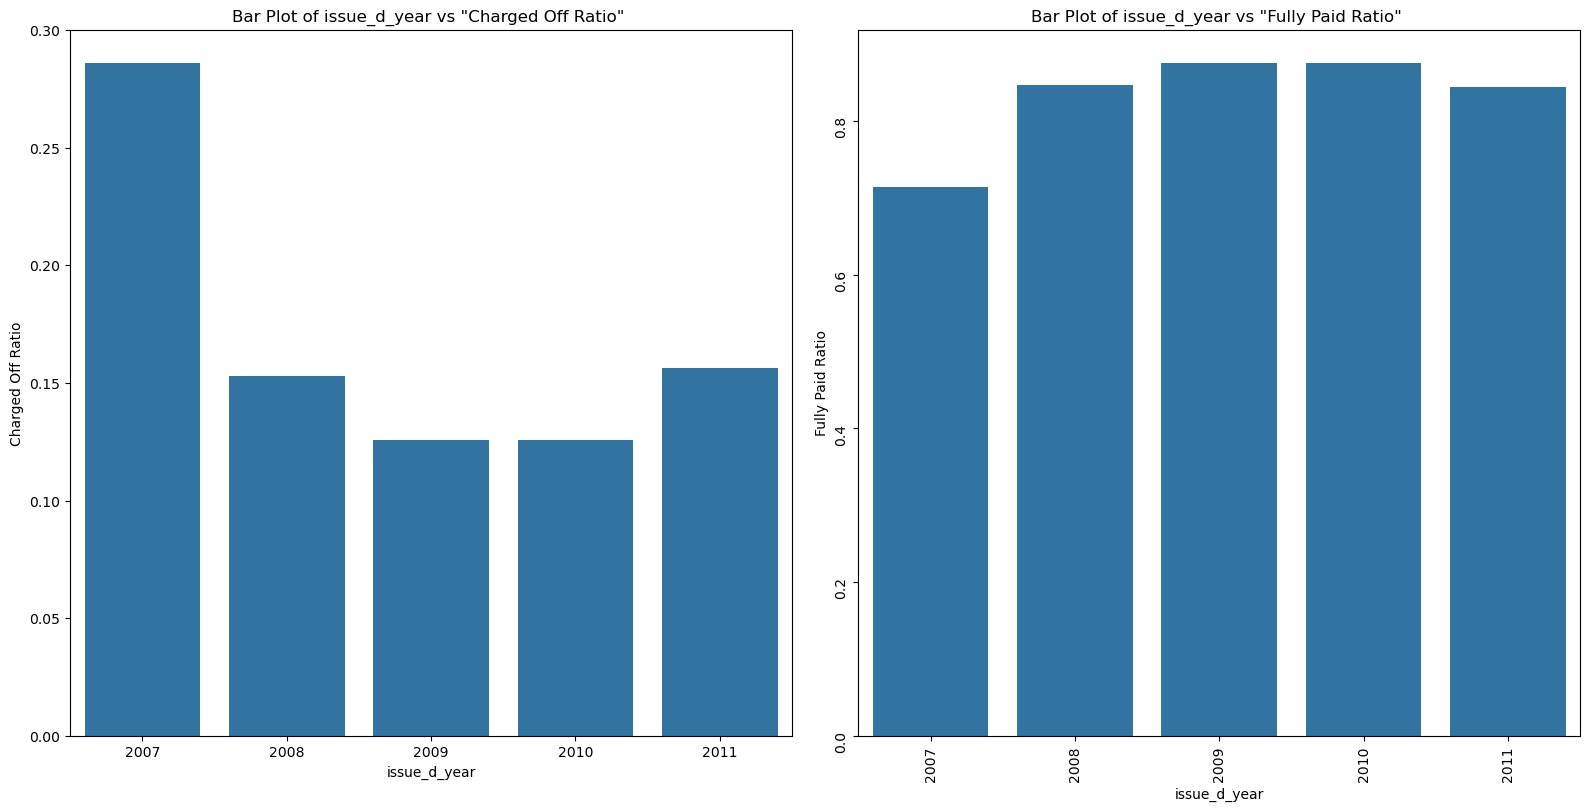

loan_status issue_d_month  Charged Off  Fully Paid  Total  Fully Paid Ratio  \
0                     Apr          355        2399   2754          0.871097   
1                     Aug          446        2838   3284          0.864190   
2                     Dec          637        3396   4033          0.842053   
3                     Feb          243        1866   2109          0.884780   
4                     Jan          281        1880   2161          0.869968   
5                     Jul          461        2757   3218          0.856743   
6                     Jun          456        2629   3085          0.852188   
7                     Mar          314        2195   2509          0.874851   
8                     May          444        2392   2836          0.843441   
9                     Nov          562        3290   3852          0.854102   
10                    Oct          544        3042   3586          0.848299   
11                    Sep          523        2850  

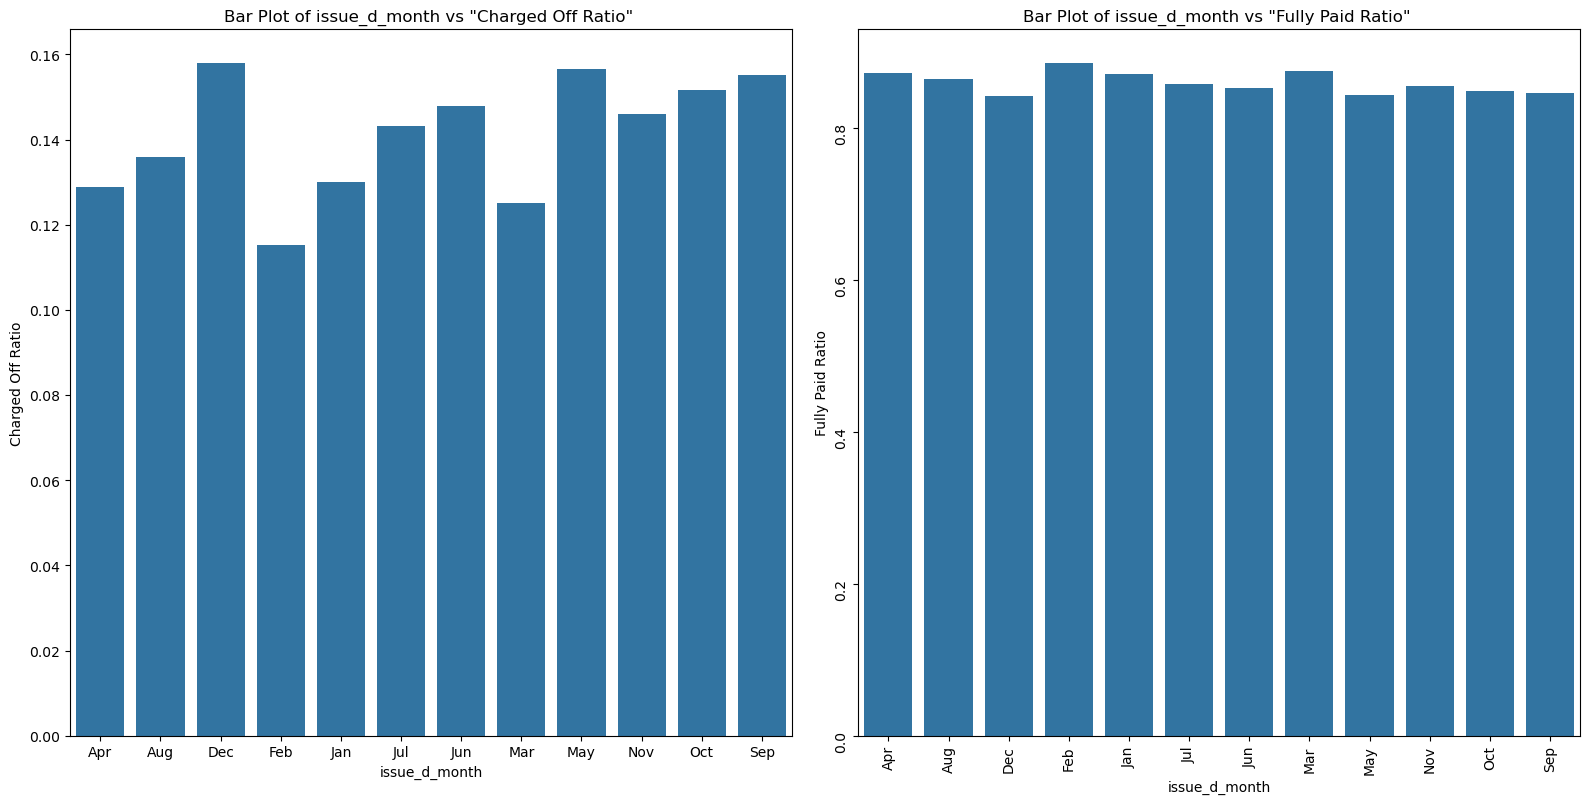

In [99]:
for col in categorical_columns_bivariate:
    compare_df = proportion_df(col,loan_df)
    print(compare_df)
    bivariate_analysis(compare_df,col)

### Correlation Analysis

In [101]:
corr_df = loan_df.copy()

In [102]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   term                    36800 non-null  int32  
 2   int_rate                36800 non-null  float64
 3   installment             36800 non-null  float64
 4   grade                   36800 non-null  object 
 5   sub_grade               36800 non-null  object 
 6   emp_length              36800 non-null  object 
 7   home_ownership          36800 non-null  object 
 8   annual_inc              36800 non-null  float64
 9   verification_status     36800 non-null  object 
 10  loan_status             36800 non-null  object 
 11  purpose                 36800 non-null  object 
 12  addr_state              36800 non-null  object 
 13  dti                     36800 non-null  float64
 14  mths_since_last_delinq  36800 non-null  flo

#### Dropping Categorical Columns

In [104]:
for col in categorical_columns:
    corr_df = corr_df.drop(columns =[col])

In [105]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   term                    36800 non-null  int32  
 2   int_rate                36800 non-null  float64
 3   installment             36800 non-null  float64
 4   annual_inc              36800 non-null  float64
 5   dti                     36800 non-null  float64
 6   mths_since_last_delinq  36800 non-null  float64
 7   open_acc                36800 non-null  int64  
 8   pub_rec                 36800 non-null  int64  
 9   revol_bal               36800 non-null  int64  
 10  revol_util              36800 non-null  float64
 11  total_acc               36800 non-null  int64  
 12  pub_rec_bankruptcies    36800 non-null  float64
dtypes: float64(7), int32(1), int64(5)
memory usage: 3.8 MB


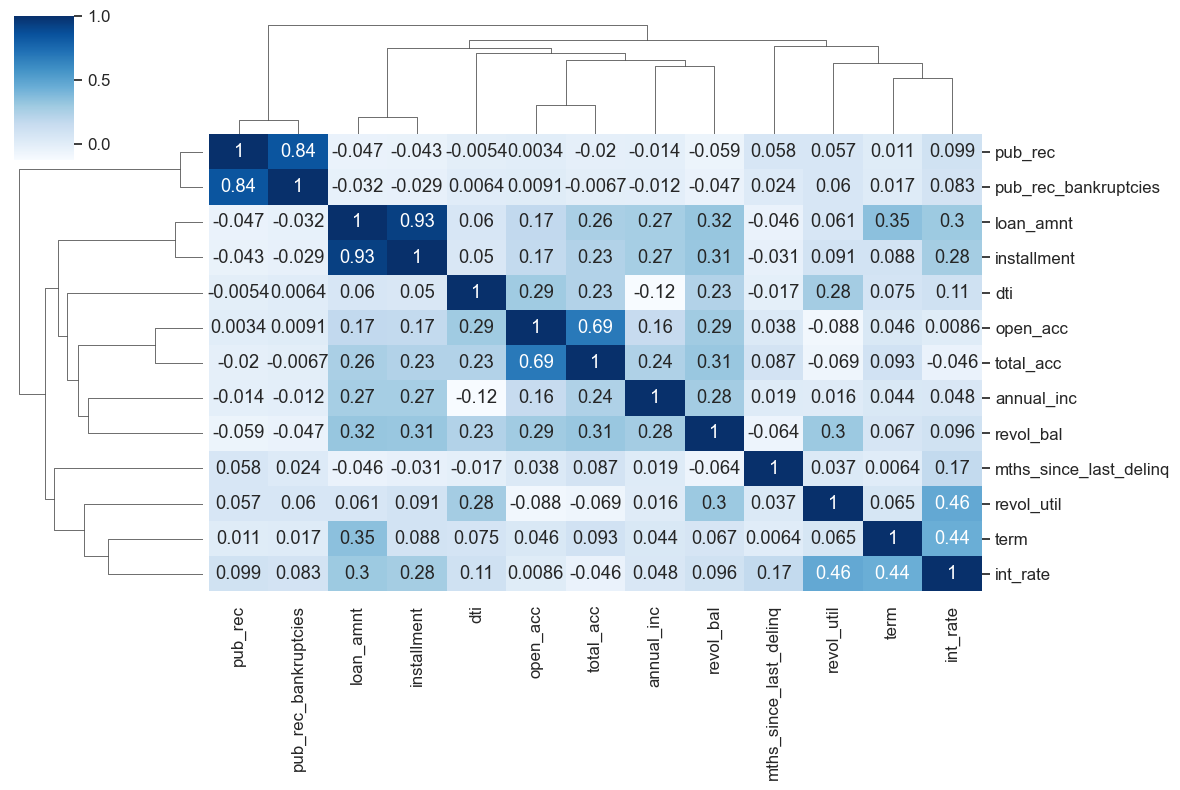

In [106]:
corr = corr_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

### Summary of correlation
1. pub_rec and pub_bankruptcies are correlated, but for analysis we can keep them. 
2. As per definition, we see open_acc and total_acc seems to be same but here the correlation is 0.69. So, we can keep them for analysis purpose.
3. All othe numerical parameters are useful for determining the loan_status